In [1]:
library(tidyverse)
# you can also just download ggplot
library(dplyr)
# install.packages("corrplot")
library(corrplot)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
corrplot 0.84 loaded


In [4]:
# convert to dataframe
mpg <- as.data.frame(mpg)

# factorize the categorical variables
mpg$manufacturer <- factor(mpg$manufacturer)
mpg$model <- factor(mpg$model)
mpg$trans <- factor(mpg$trans)
mpg$drv <- factor(mpg$drv)
mpg$cty <- factor(mpg$cty)
mpg$fl <- factor(mpg$fl)
mpg$class <- factor(mpg$class)

head(mpg, 10)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


# EDA

### Graphing Template

> ggplot(data = [DATA]) + 
  [GEOM_FUNCTION](mapping = aes([MAPPING]))

> data %>%
    ggplot(mapping = aes([MAPPING])) + [GEOM_FUNCTION] ()


A geom is the name for the specific shape that we want to use to visualize the data.
* To create a line graph with ggplot() + geom_line() function. 
* To create a scatter plot we use ggplot() + geom_point() creates a line graph
* To create a scatter plot we use ggplot() + geom_histogram() creates a histogram
* To create a scatter plot we use ggplot() + geom_bar() creates a barchart
* To creat a boxplot we use ggplot() + geom_boxplot()

### Line Graphs + Scatter Plot

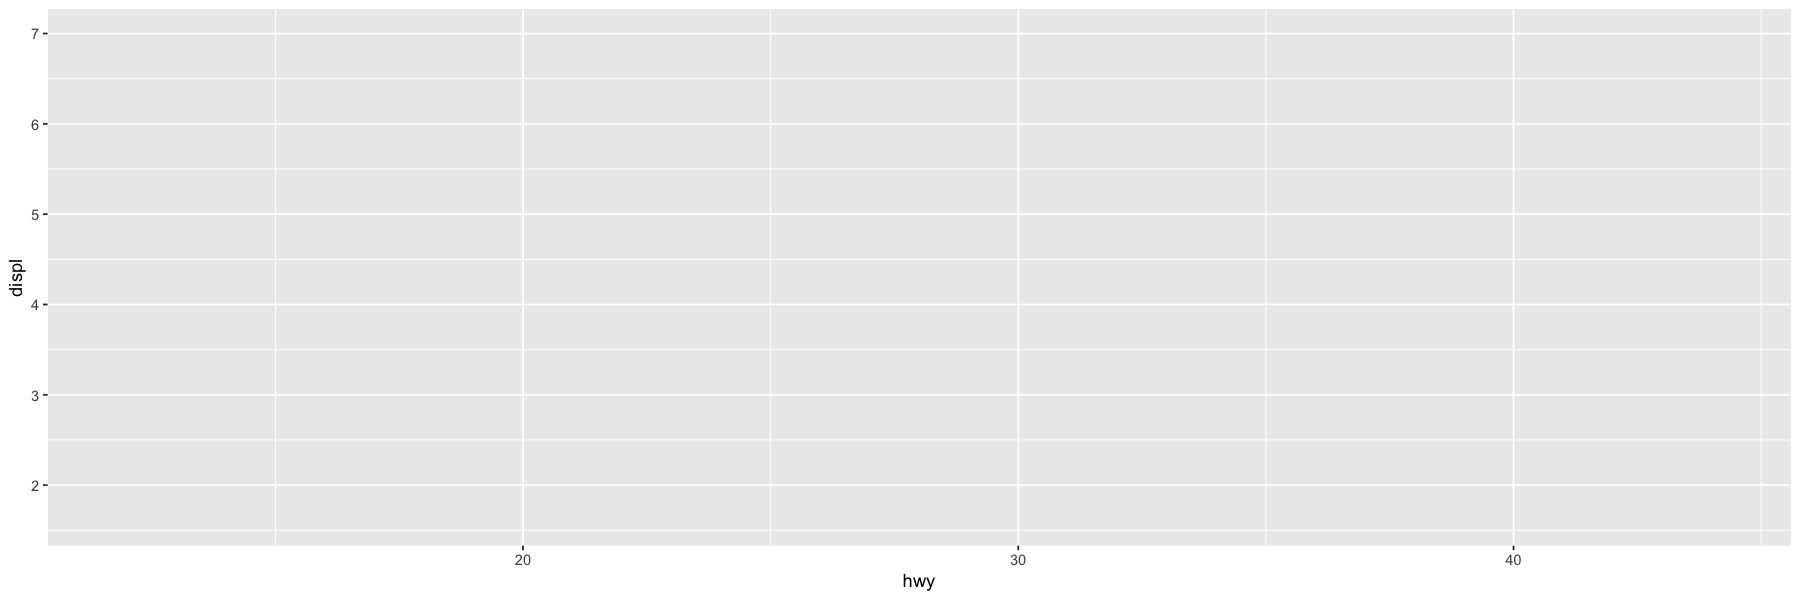

In [32]:
# build the axis

mpg %>%
  ggplot(aes(x = hwy, y = displ)) 
    

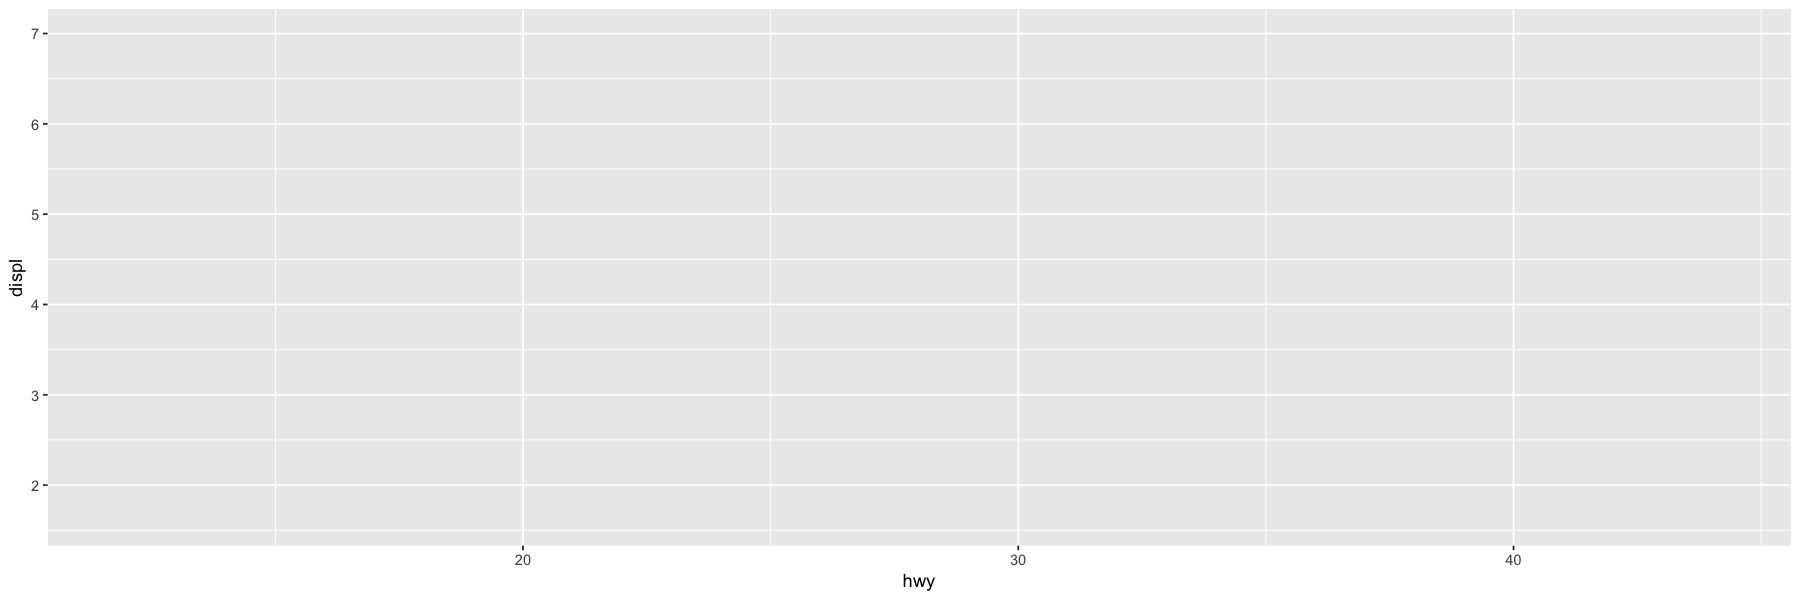

In [34]:
# that's a big plot - can we resize it?

library(repr) # this beautiful package can help with that

options(repr.plot.width=15, repr.plot.height=5)

ggplot(data=mpg, aes(x = hwy, y = displ)) 

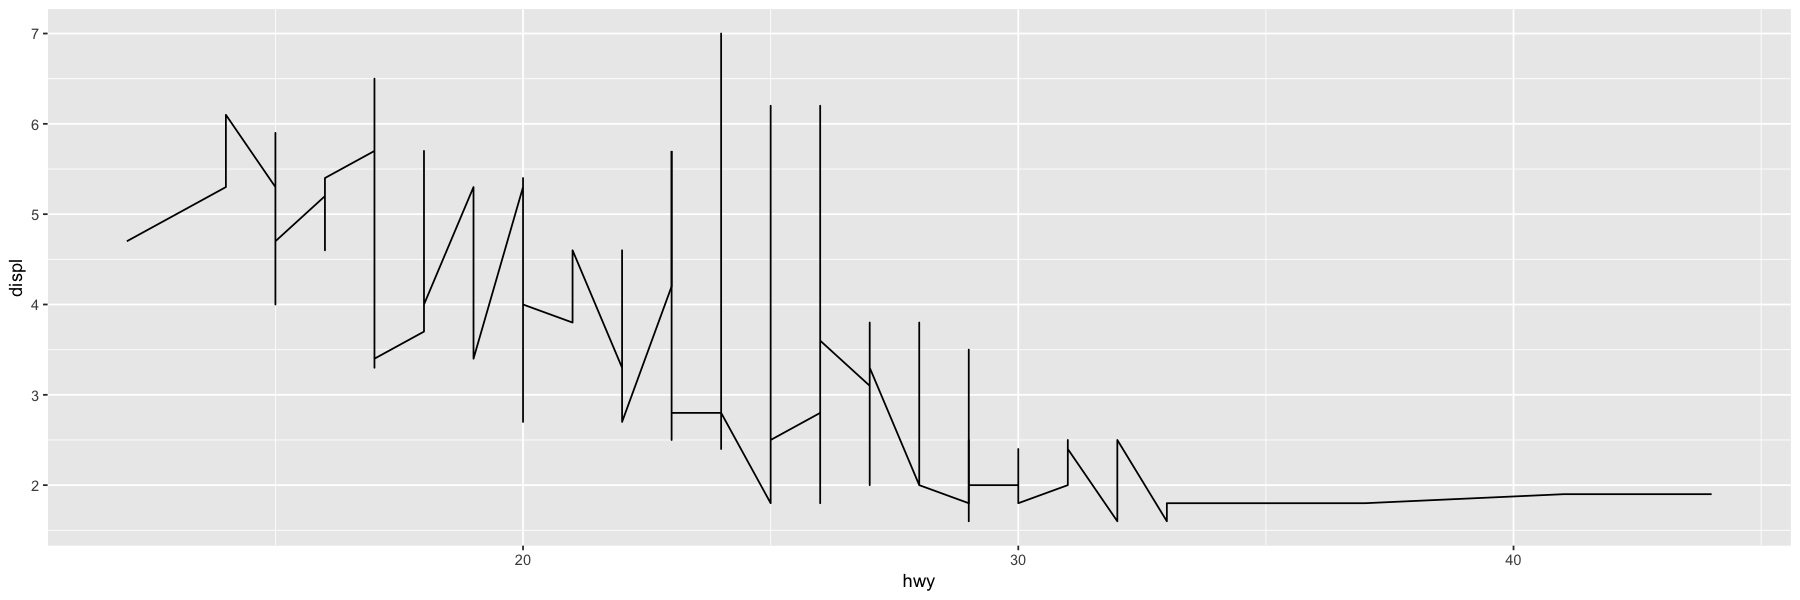

In [39]:
# Line Graph

mpg %>%
  ggplot(aes(x = hwy, y = displ)) + geom_line()

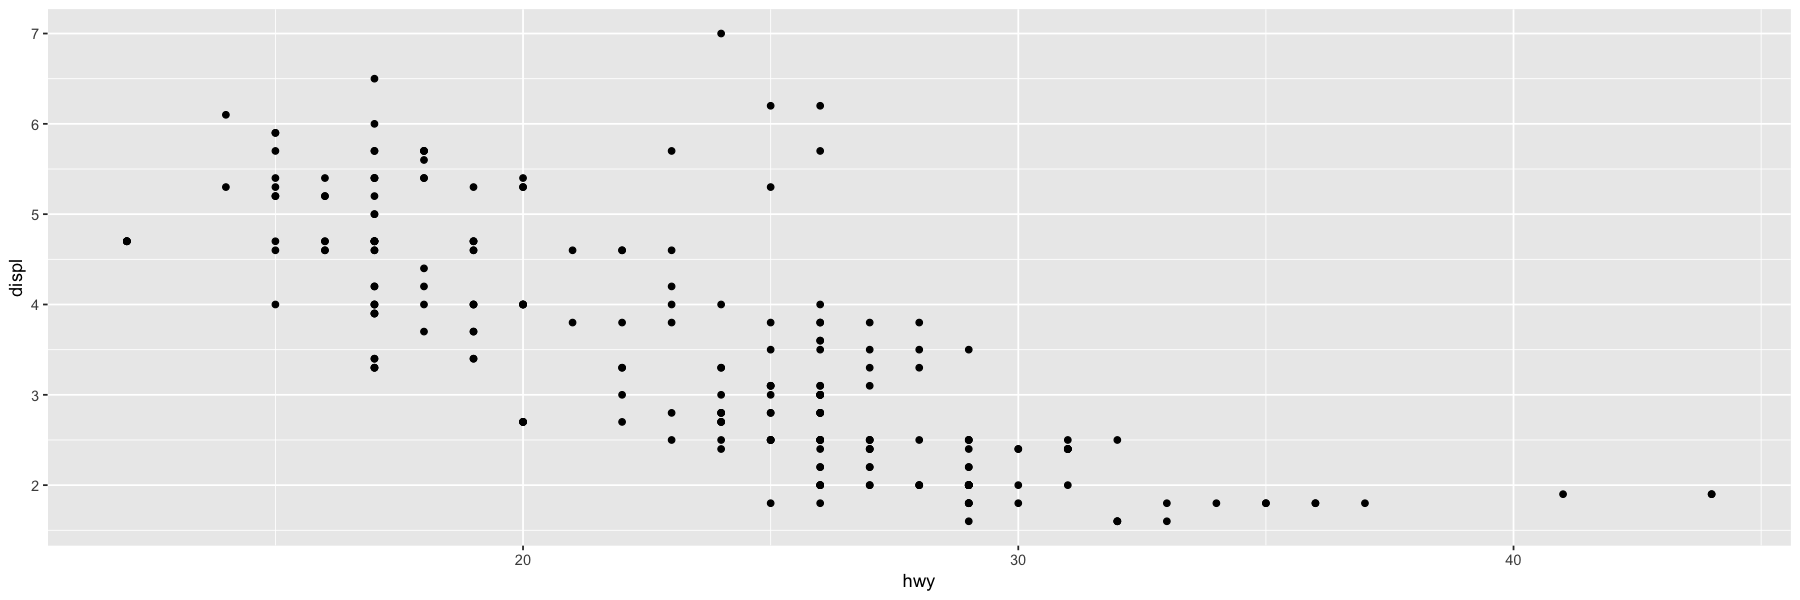

In [42]:
# Scatter Plot

mpg %>%
  ggplot(aes(x = hwy, y = displ)) + geom_point()

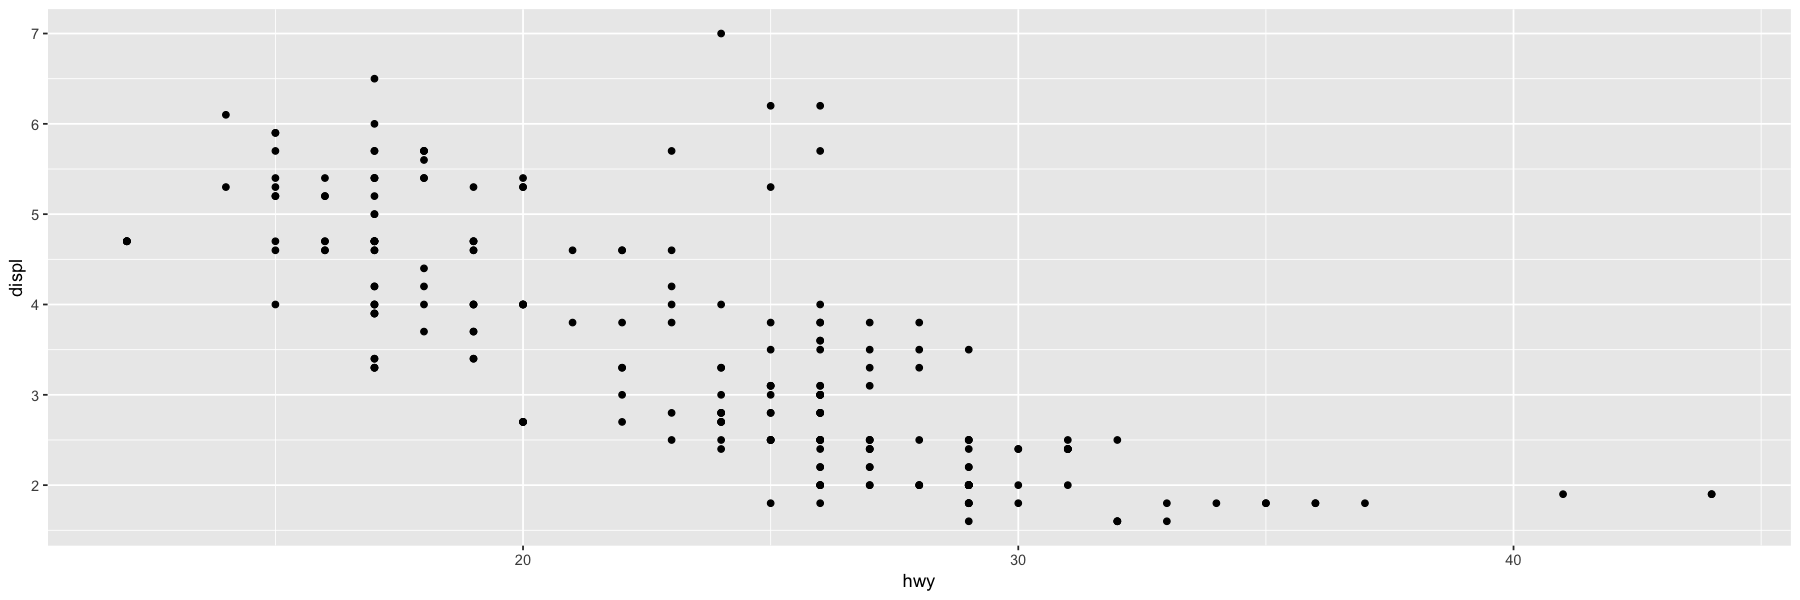

In [43]:
# Scatter Plot 

ggplot(data=mpg) + geom_point(aes(x = hwy, y = displ))

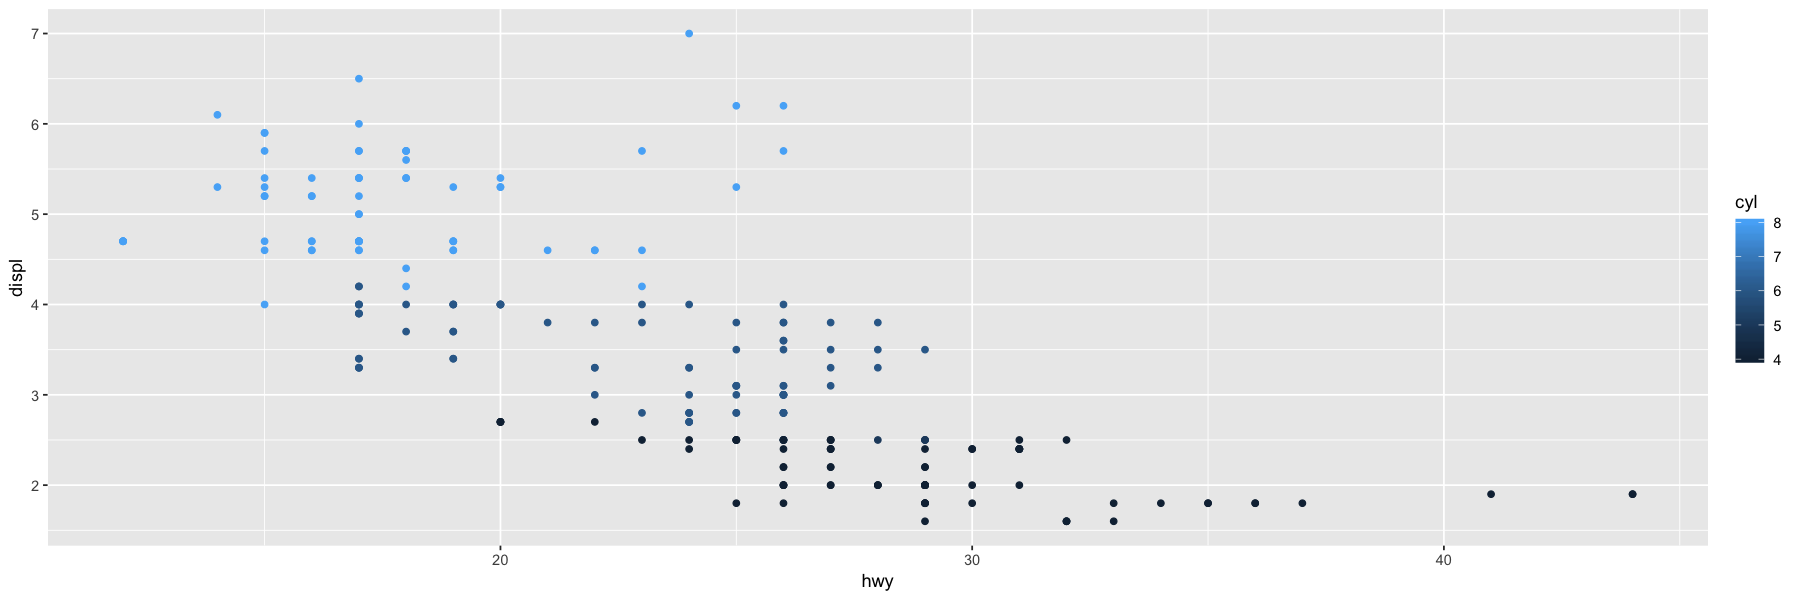

In [257]:
# Scatter plots by group

options(repr.plot.width=15, repr.plot.height=5)


mpg %>%
  ggplot(aes(x = hwy, y = displ)) + 
      geom_point(aes(color = cyl))


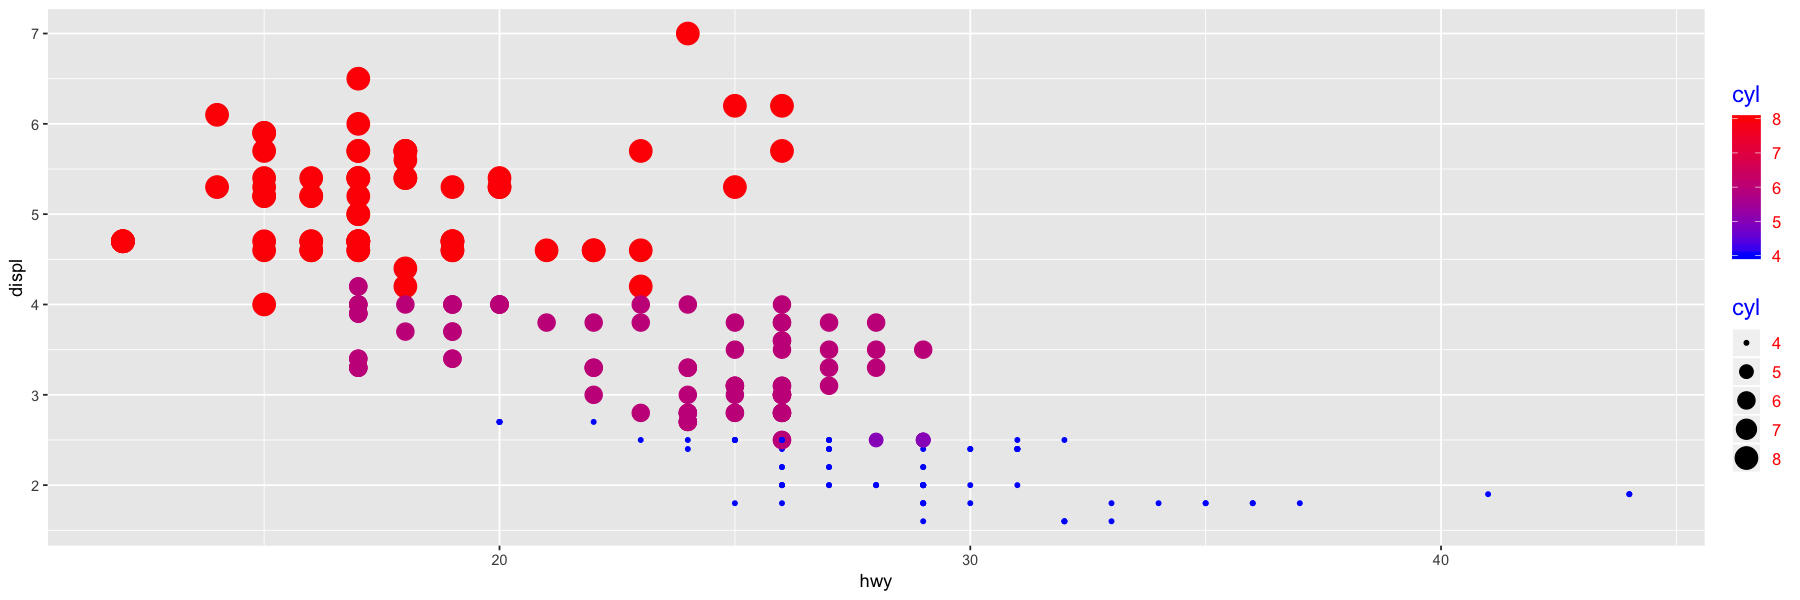

In [273]:
# Format the scatter plot by group, with the groups by size and the legend adjusted

mpg %>%
  ggplot(aes(x = hwy, y = displ)) + 
      geom_point(aes(color = cyl, size=cyl)) +
      theme(legend.title = element_text(color = "blue", size = 14),
            legend.text = element_text(color = "red", size = 10)) +
      scale_color_gradient(low="blue", high="red")
      # scale_color_gradientn(colours = rainbow(5))

### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


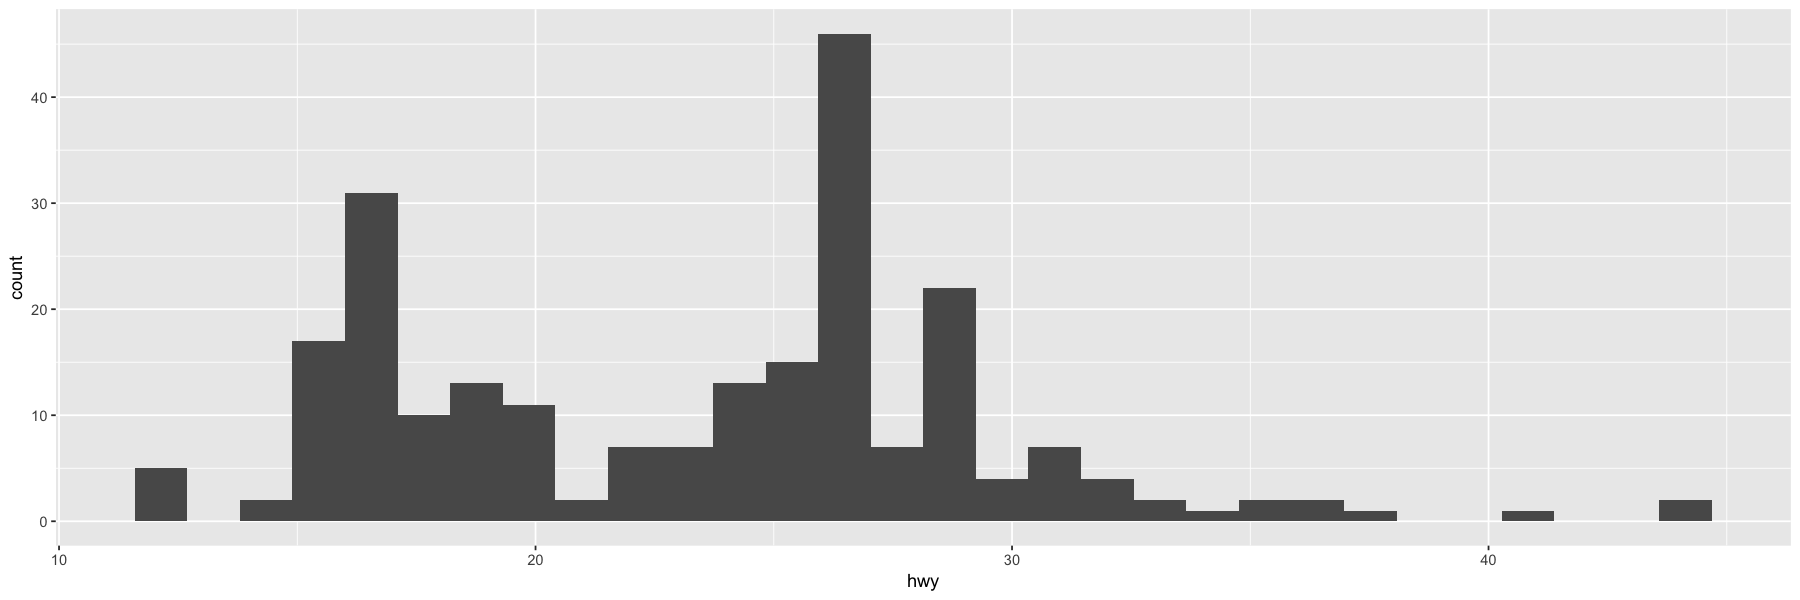

In [46]:
mpg %>%
    ggplot(aes(x=hwy)) + geom_histogram()

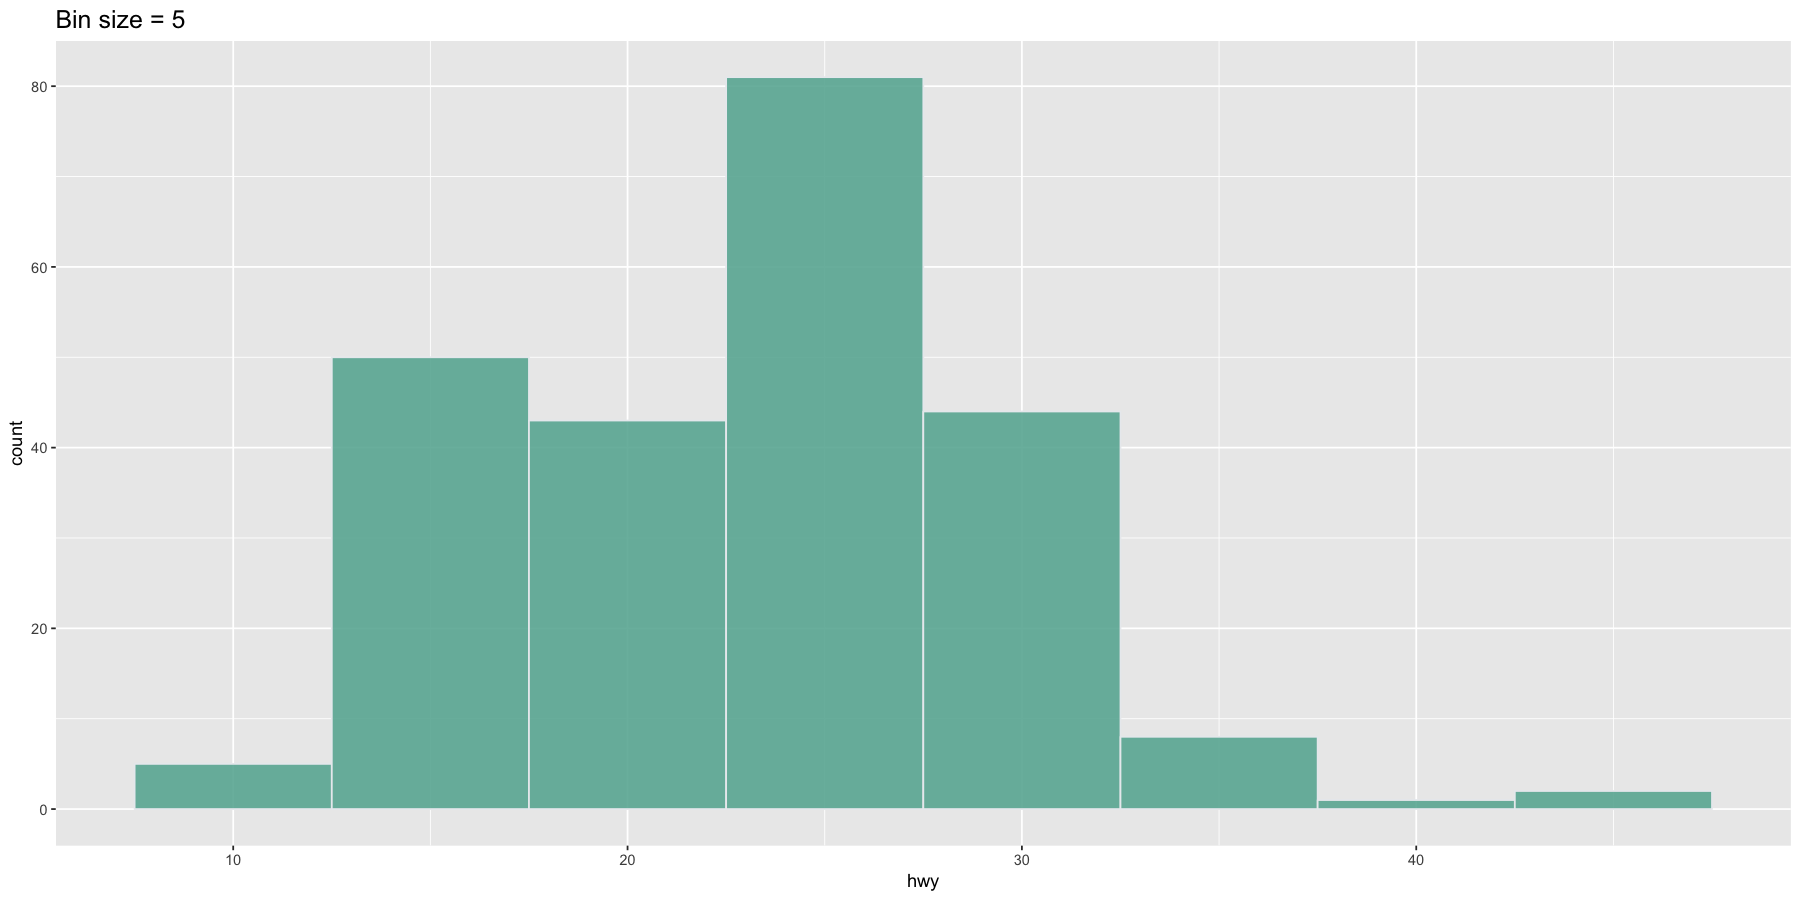

In [221]:
# Simple histogram

p <- mpg %>% 
    ggplot(aes(x=hwy)) + 
        geom_histogram(binwidth=5, fill="#69b3a2", color="#e9ecef", alpha=0.9) +
        ggtitle("Bin size = 5") +
        theme(plot.title = element_text(size=15))

p

### Bar Charts

In [50]:
# How many models of cars do we have?

# Need to manipulate the data first - feel free to use another way
models <- mpg %>%
            count(model) 

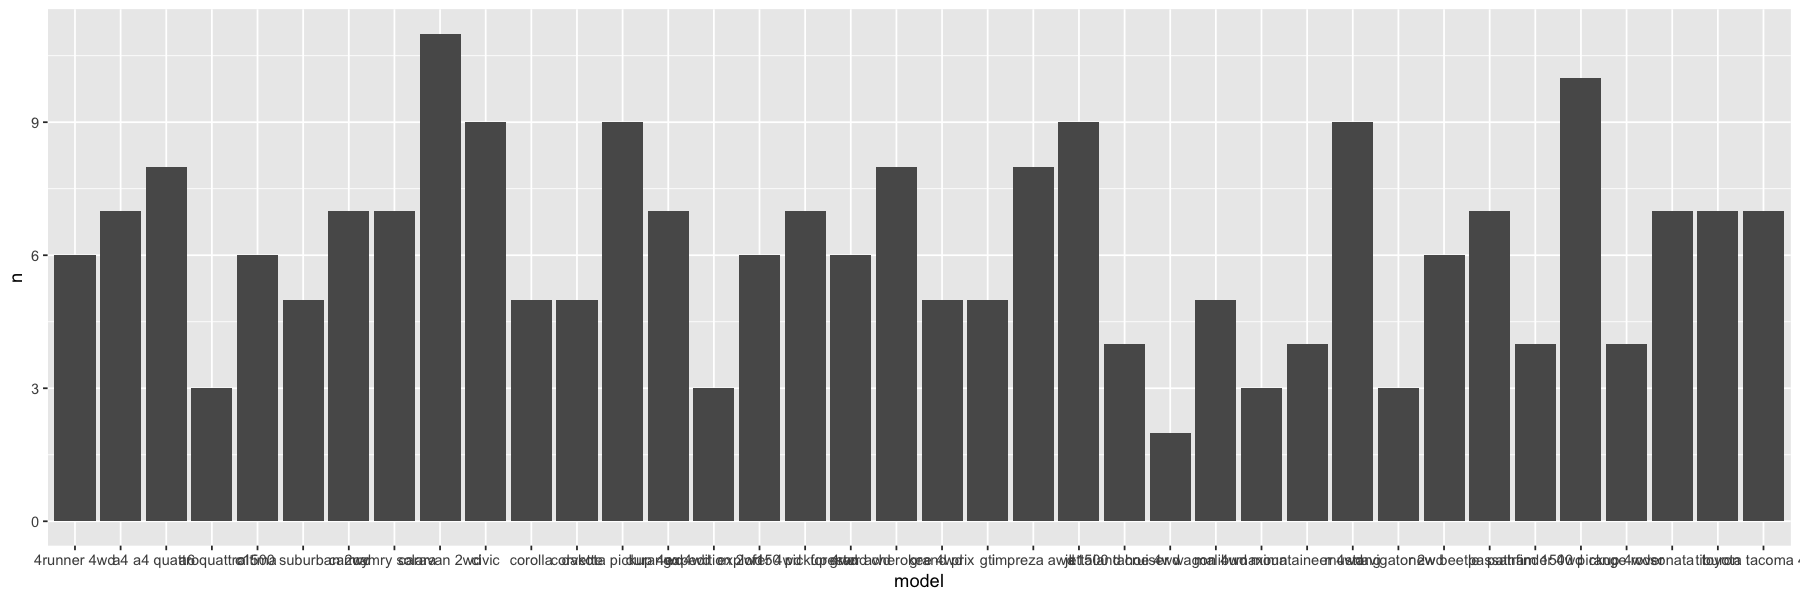

In [51]:
options(repr.plot.width=15, repr.plot.height=5)

g <- models %>%
         ggplot(aes(x=model, y=n)) +
             geom_bar(stat ="identity")

g

In [52]:
# Still not able to read the x-axis ticks. Are we able to change the of the x-axis texts?

g <- g + theme(axis.text.x = element_text(angle=90, hjust=1, size=12))


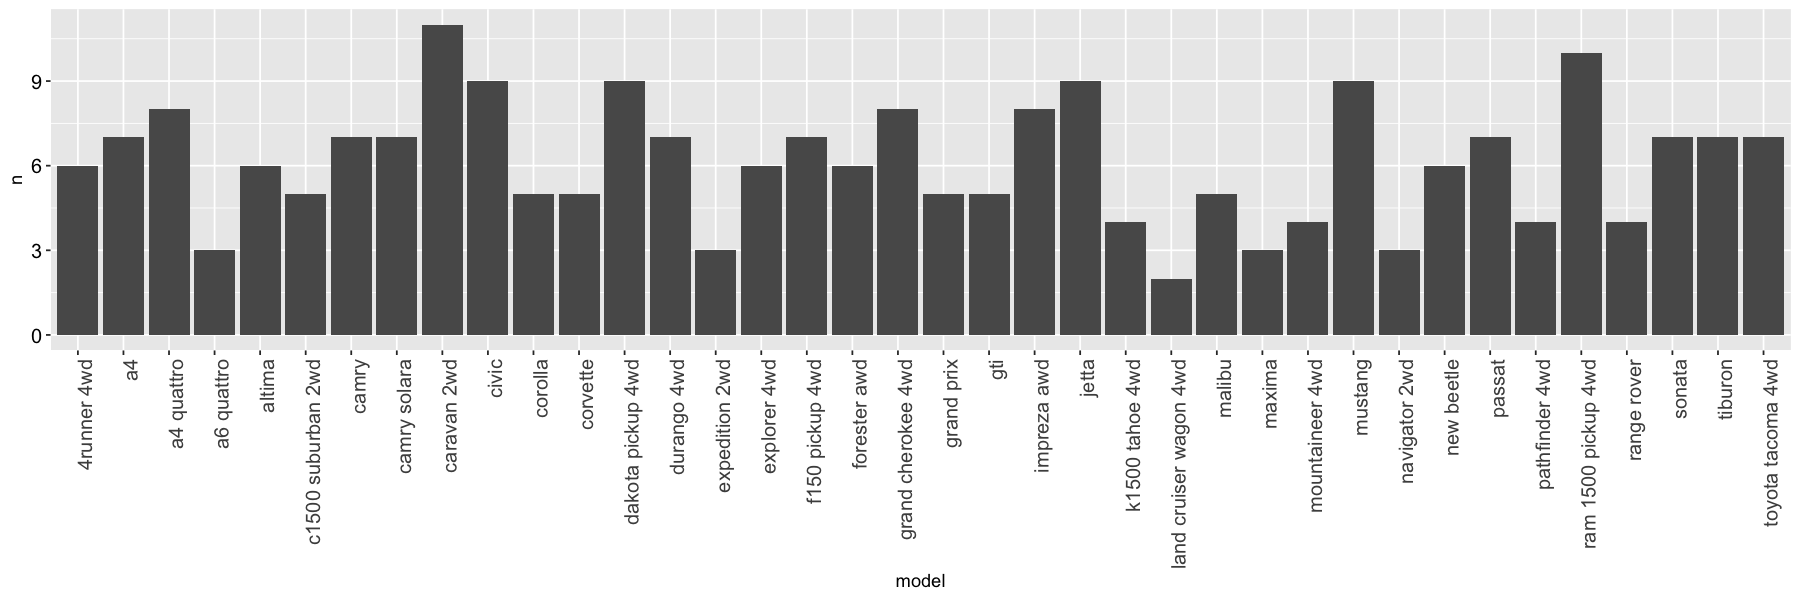

In [53]:
# Change y-axis text

g <- g + theme(axis.text.y = element_text(size=12, color='black'))

g

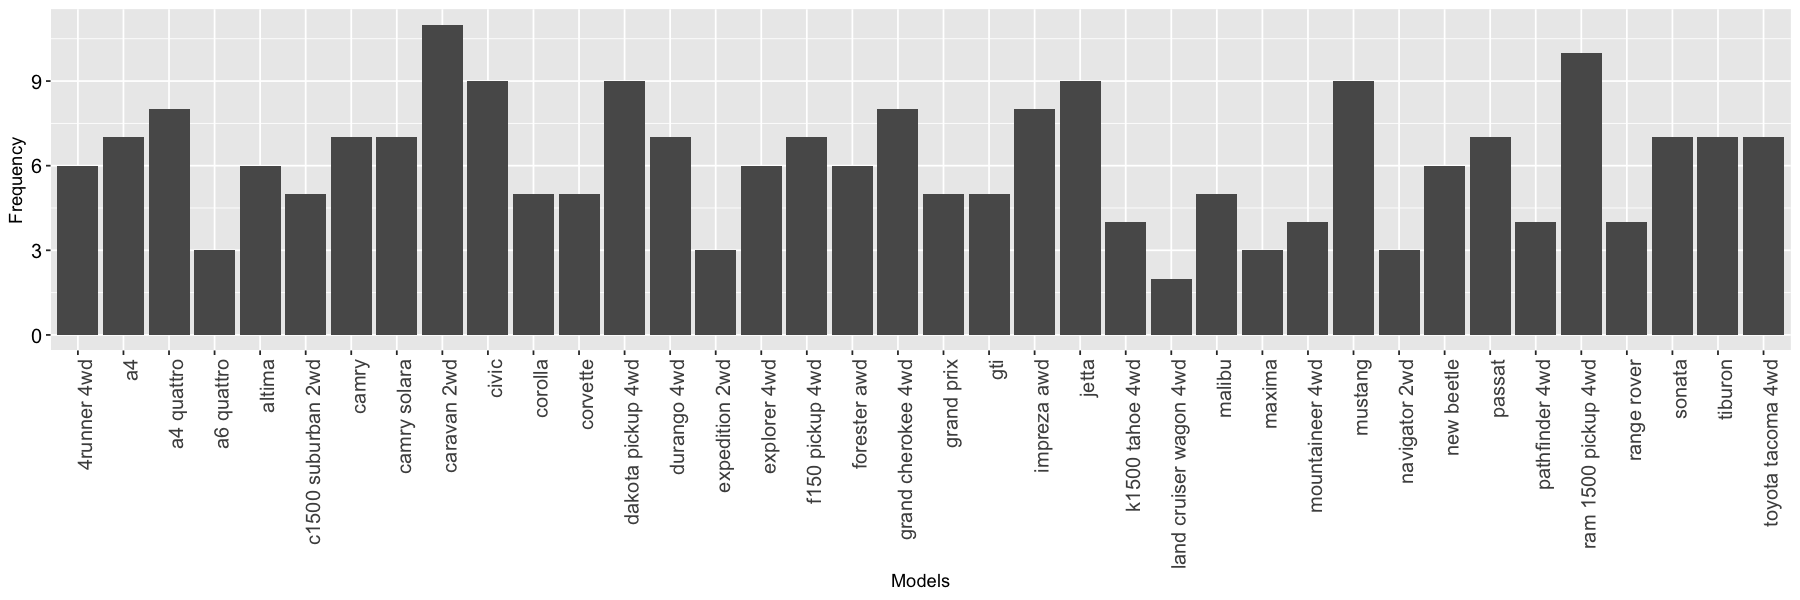

In [54]:
# Can we change the labels? Make them more meaningful?

g <- g + xlab('Models') 
g <- g + ylab('Frequency') 

g

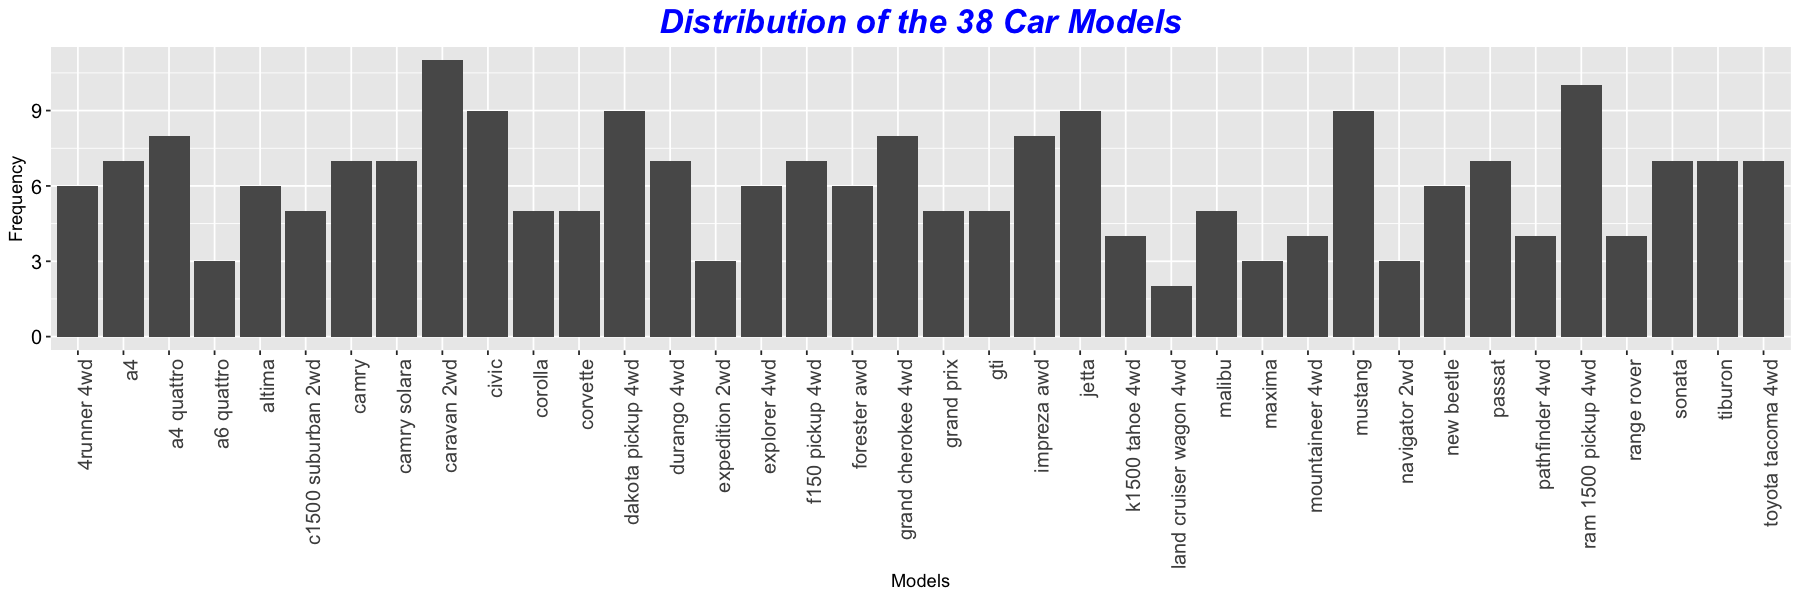

In [55]:
# Add Title
g <- g + ggtitle("Distribution of the 38 Car Models")
g <- g + theme(plot.title = element_text(color="blue", size=20, face="bold.italic", hjust = 0.5))

g

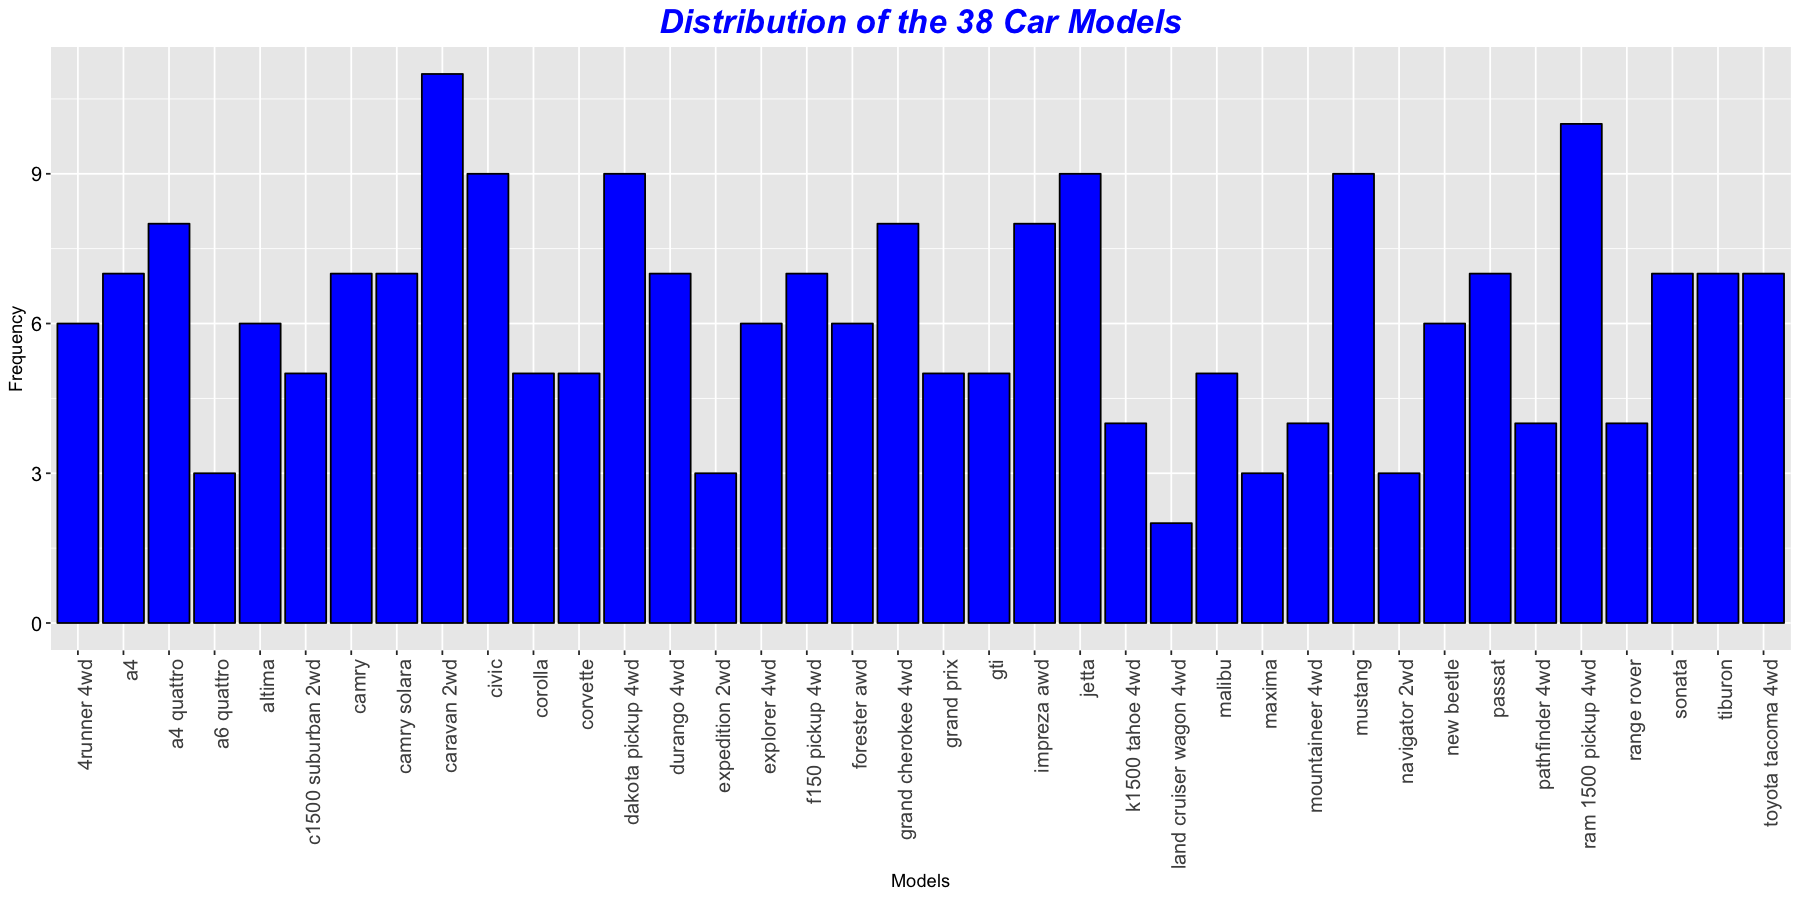

In [57]:
# Aesthetics -- the colour and/or layout of the graph

g + 
 geom_bar(stat="identity", color="black", fill="blue") 

#  theme_minimal() +
#  geom_text(aes(label=n), vjust=-0.3, size=5) # add labels
#  theme(axis.text.x = element_text(angle=90, hjust=1, size=12),
#                   axis.text.y = element_text(size=12),
#                   plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)
#                  )


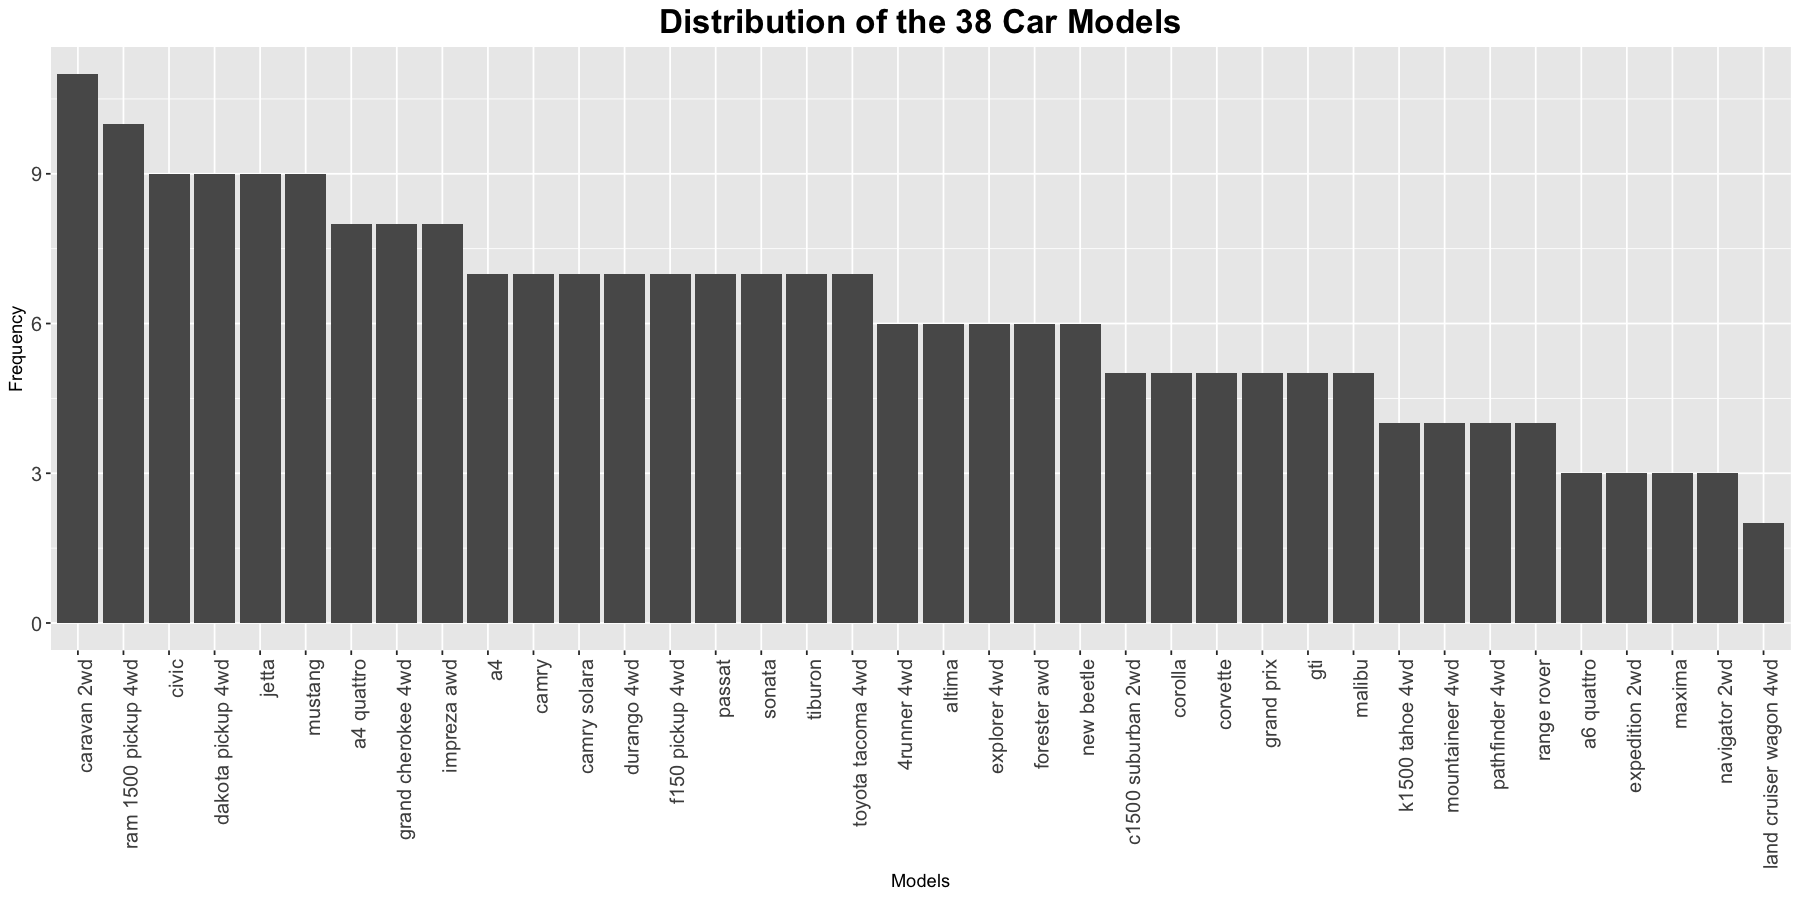

In [56]:
# Can we order the plot by frequency?

# order by frequency
options(repr.plot.width=15, repr.plot.height=7.5)

models %>%
        ggplot(aes(x = reorder(model,-n),n)) + 
            geom_bar(stat ="identity") + 
            theme(axis.text.x = element_text(angle=90, hjust=1, size=12),
                  axis.text.y = element_text(size=12),
                  plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)) +
             xlab('Models') +
             ylab('Frequency') +
             ggtitle("Distribution of the 38 Car Models")

In [109]:
# Suggested Exercise to do as a group:

# 1. Draw a horizontal graph 
# Hint: Use coord_flip()


In [67]:
# SOLUTION TO EXERCISE

# models %>%
#         ggplot(aes(x = reorder(model,-n),n)) + 
#             geom_bar(stat ="identity") +
#                 coord_flip()

### Boxplots

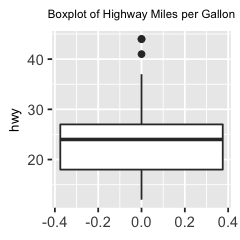

In [110]:
# Plot a boxplot for a singular numerical variable - hwy

options(repr.plot.width=2, repr.plot.height=2)

mpg %>%
    ggplot(aes(y=hwy)) +
        geom_boxplot() + 
        ggtitle("Boxplot of Highway Miles per Gallon") +
        theme(axis.title.y = element_text(size=8),
              plot.title = element_text(color="black", size=7, hjust = 0.5)) 
        

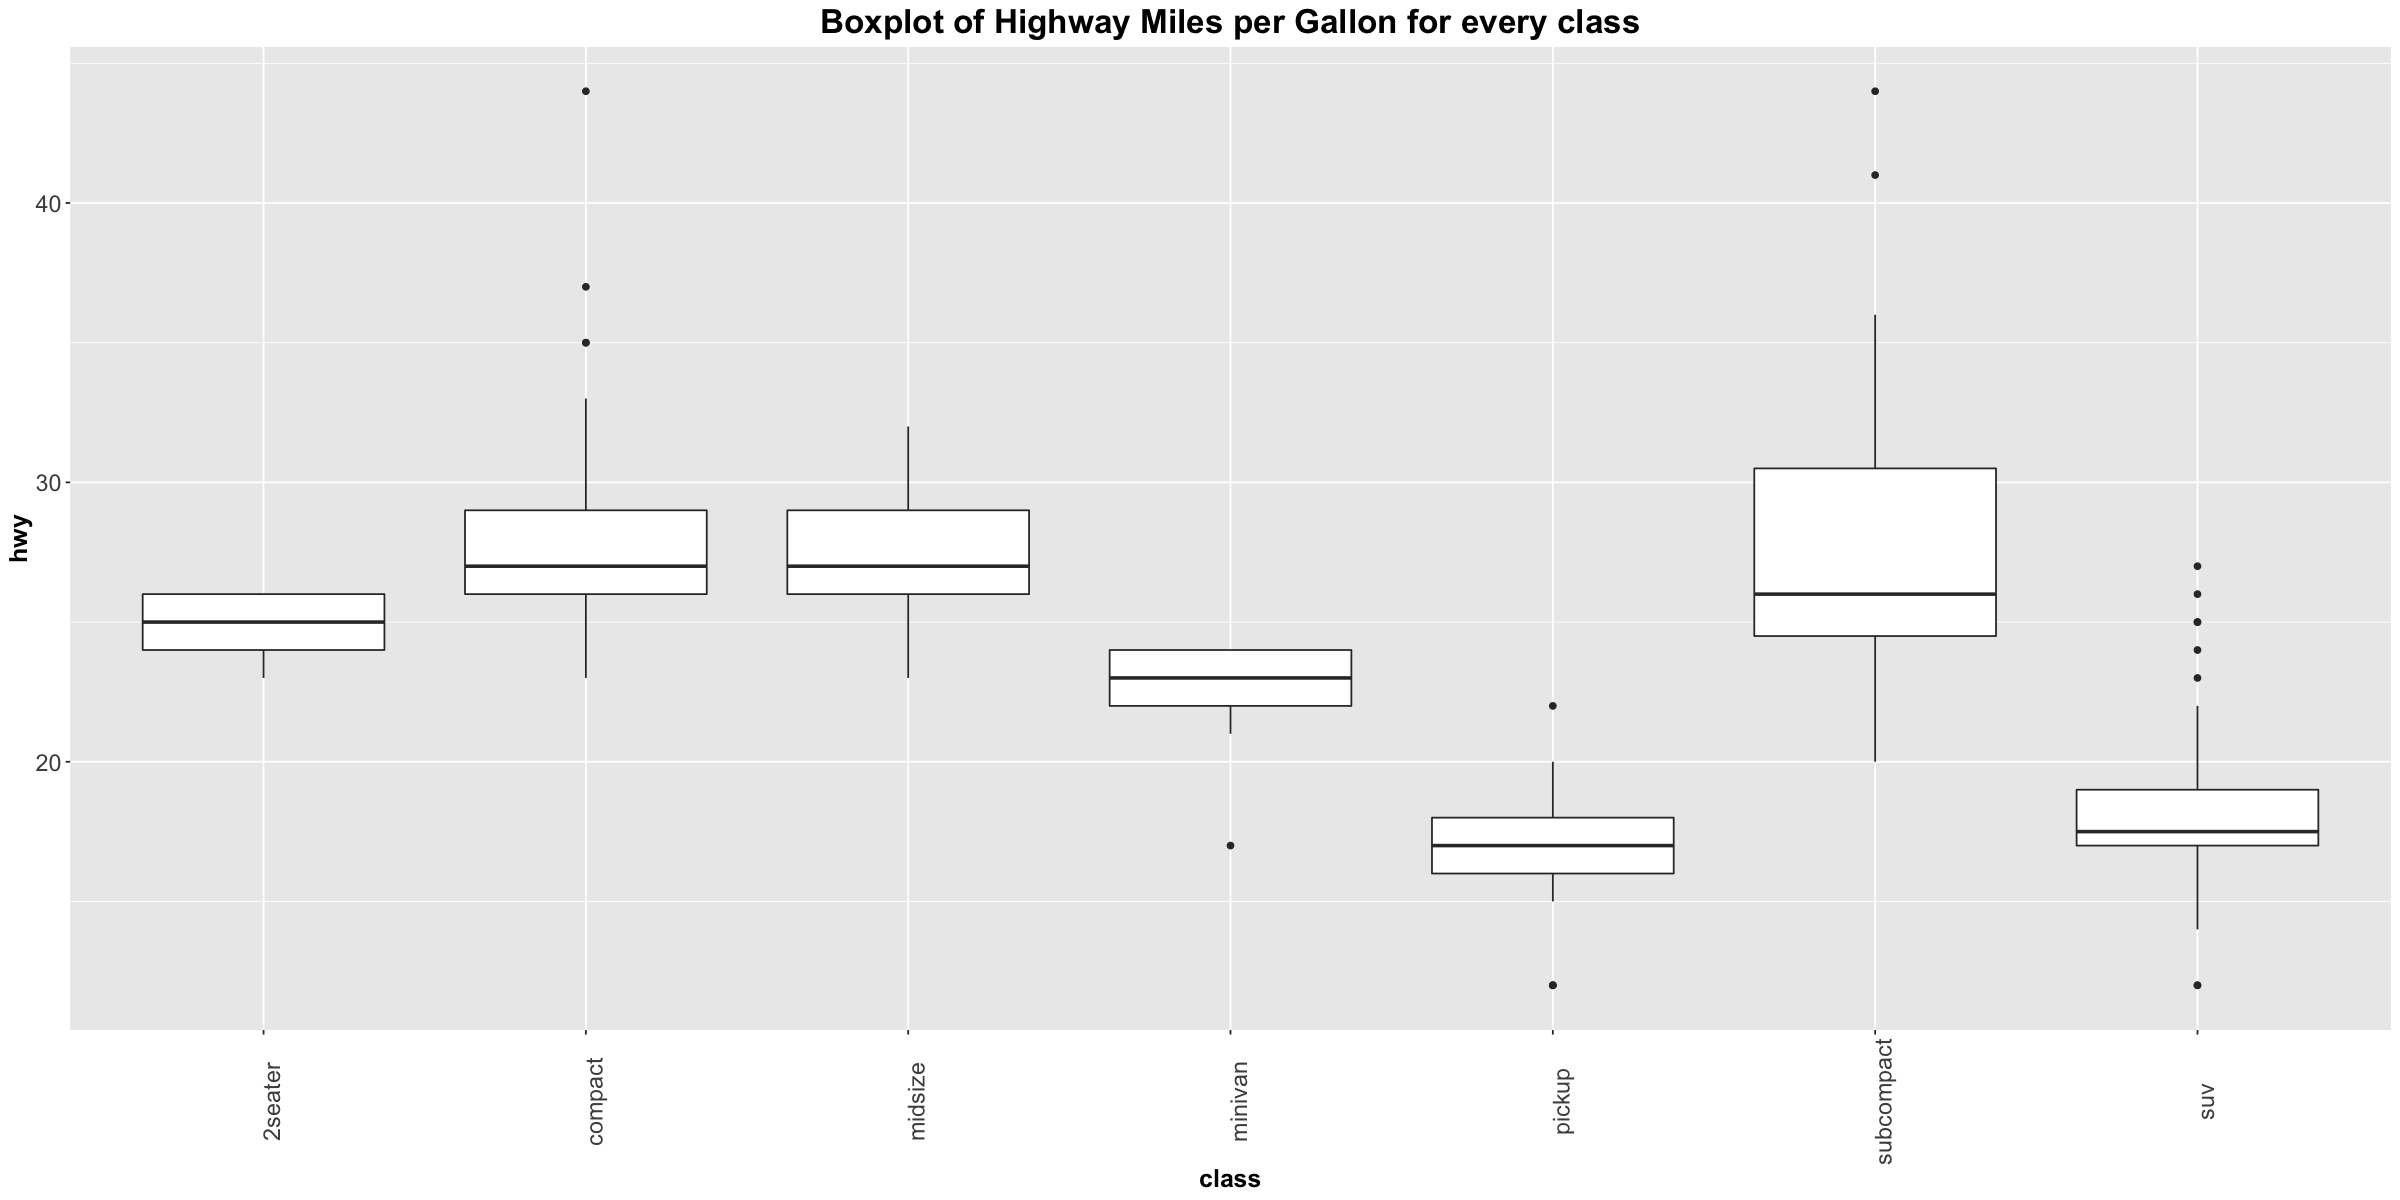

In [157]:
# Plot a boxplot for hwy for all classes

options(repr.plot.width=20, repr.plot.height=10)

mpg %>%
    ggplot(aes(x=class, y=hwy)) +
        geom_boxplot() + 
        ggtitle("Boxplot of Highway Miles per Gallon for every class") +
        theme(axis.title.x = element_text(size=15, face="bold"),
              axis.title.y = element_text(size=15, face="bold"),
              axis.text.x = element_text(size=14, angle=90),
              axis.text.y = element_text(size=14),
              plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)) 

# You can also play with themes to adjust the plots

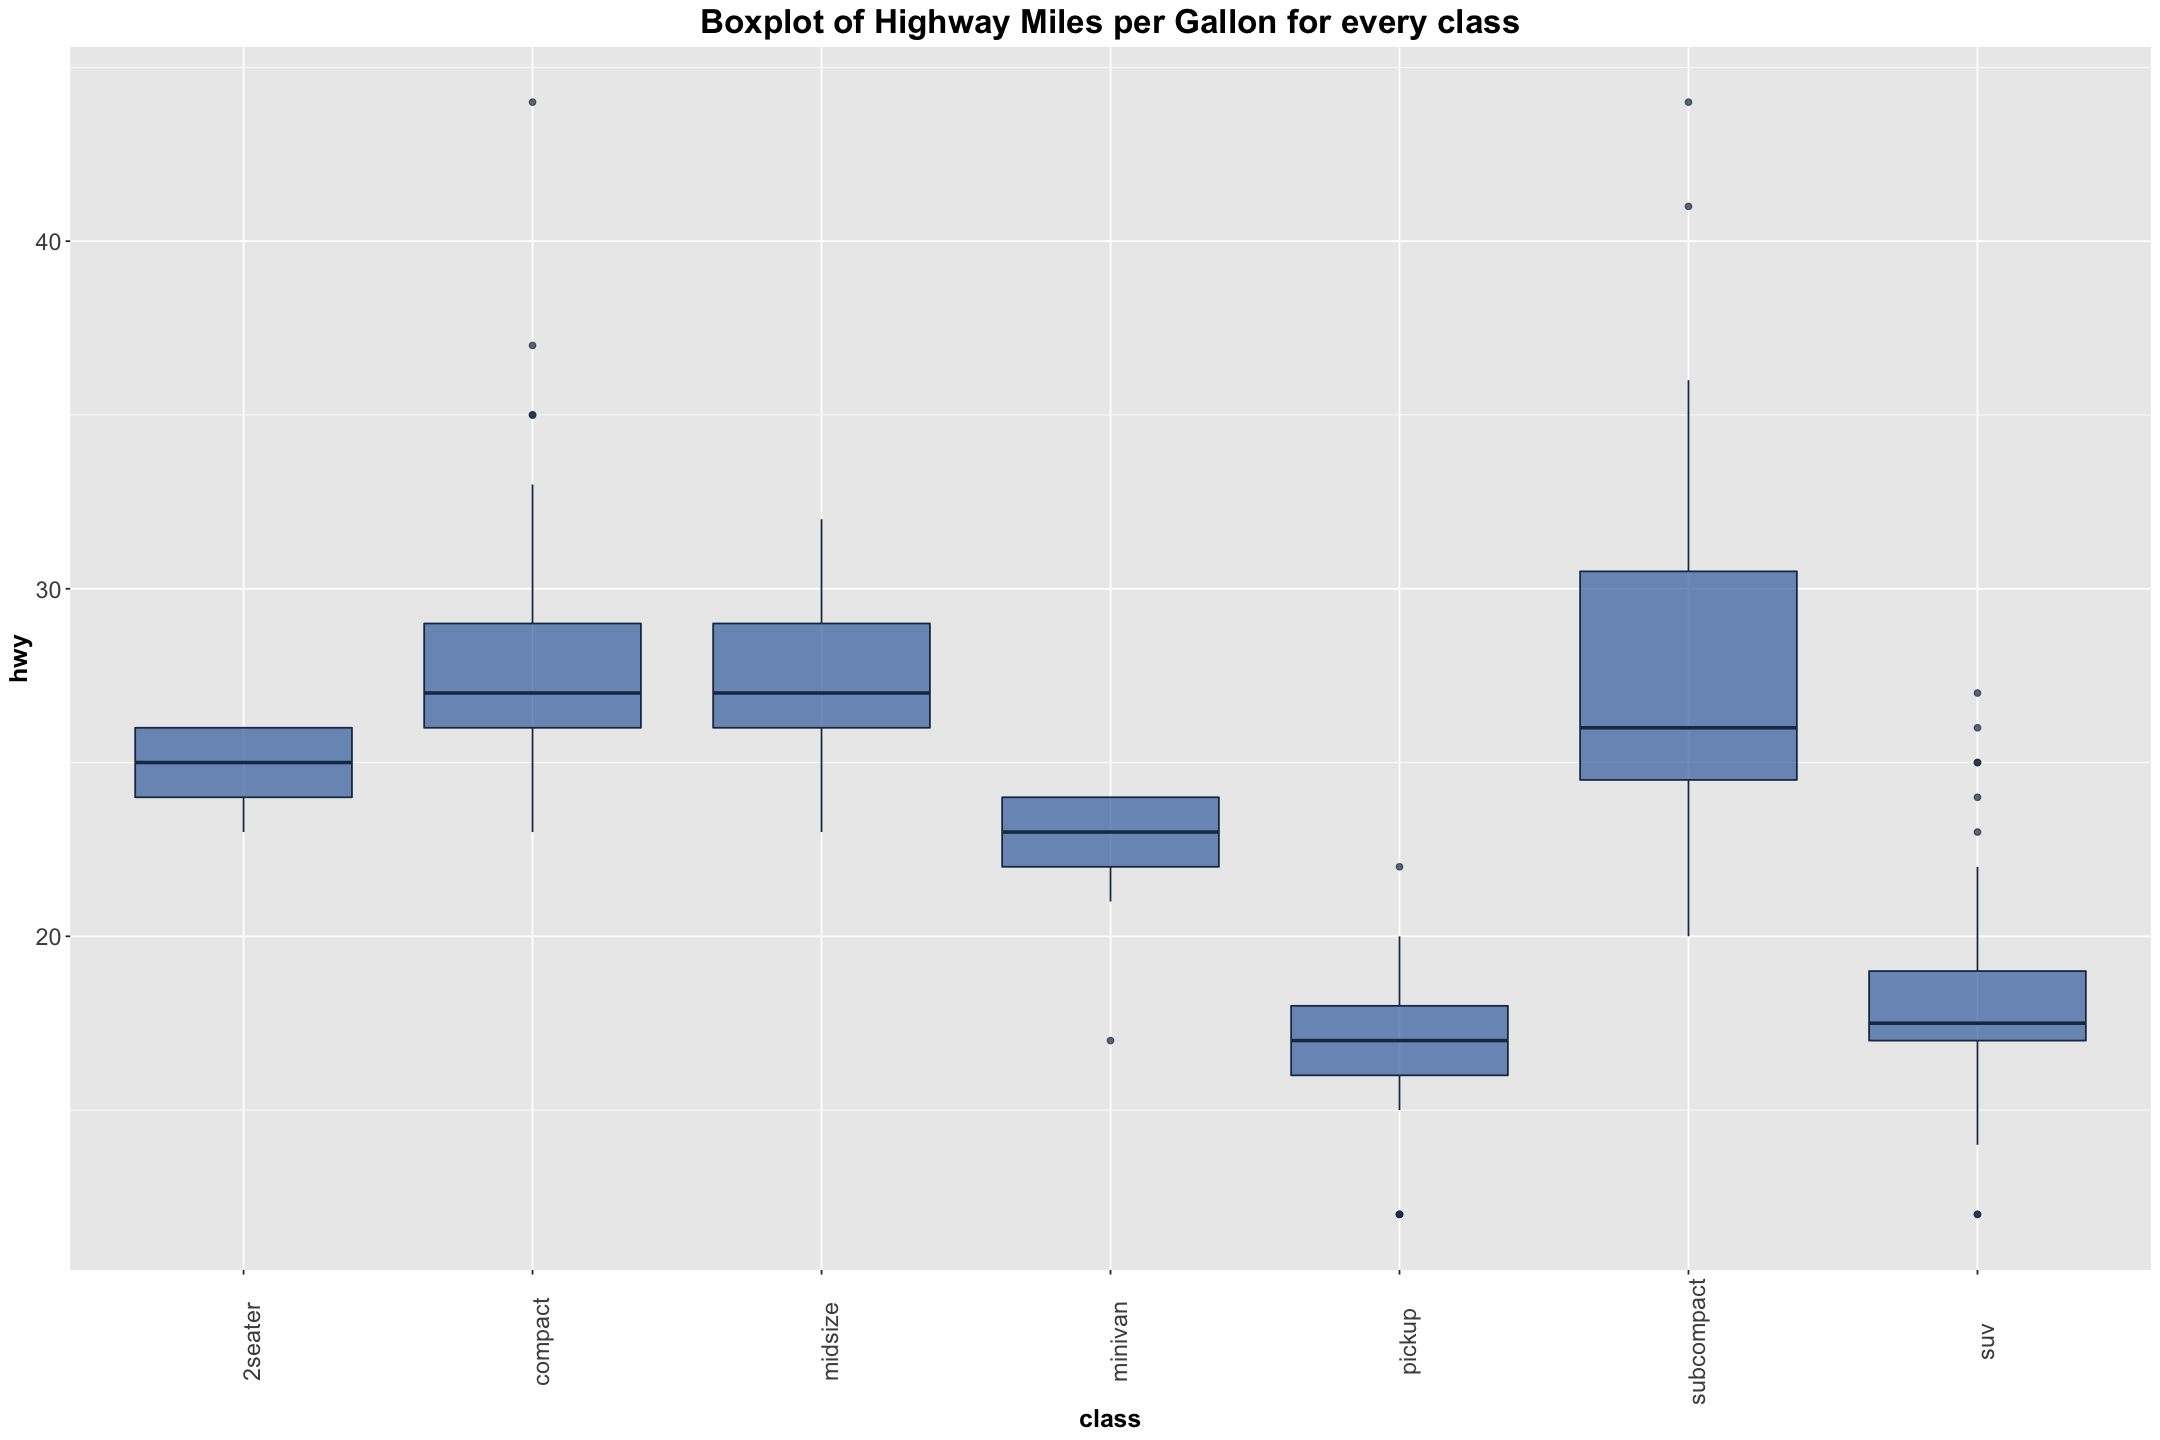

In [203]:
# Formatting the boxplots - through adjusting colours 

options(repr.plot.width=18, repr.plot.height=12)

bp <- mpg %>%
        ggplot(aes(x=class, y=hwy)) +
            geom_boxplot(fill="#4271AE", color="#1F3552", alpha=0.7) + 
            ggtitle("Boxplot of Highway Miles per Gallon for every class") + 
            theme(axis.title.x = element_text(size=15, face="bold"),
                  axis.title.y = element_text(size=15, face="bold"),
                  axis.text.x = element_text(size=14, angle=90),
                  axis.text.y = element_text(size=14),
                  plot.title = element_text(color="black", size=20, face="bold", hjust = 0.5)) 

bp

In [217]:
# Adjust the scales of the boxplot, the lines, color, fill

bp <- bp +
    geom_boxplot(fill="red1", color="black", alpha=0.7, size = 1) 
    scale_y_continuous(breaks = seq(0, 50, 10),
                       limits = c(0, 50))

# goldenrod2

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --   50

In [201]:
# You can also play and create your own themes 
# All the options to create your own theme

# bp + 
#     theme_minimal() +
#     theme(panel.grid.major = element_line(colour = "#d3d3d3"),
#           panel.grid.minor = element_blank(),
#           panel.background = element_blank(),
#           plot.title = element_text(size = 14, face = "bold"),
#           text=element_text(),
#           axis.title = element_text(face="bold"),
#           axis.text.x = element_text(colour="black", size = 11),
#           axis.text.y = element_text(colour="black", size = 9),
#           axis.line = element_line(size=0.5, colour = "black"))


# Resources: https://t-redactyl.io/blog/2016/04/creating-plots-in-r-using-ggplot2-part-10-boxplots.html

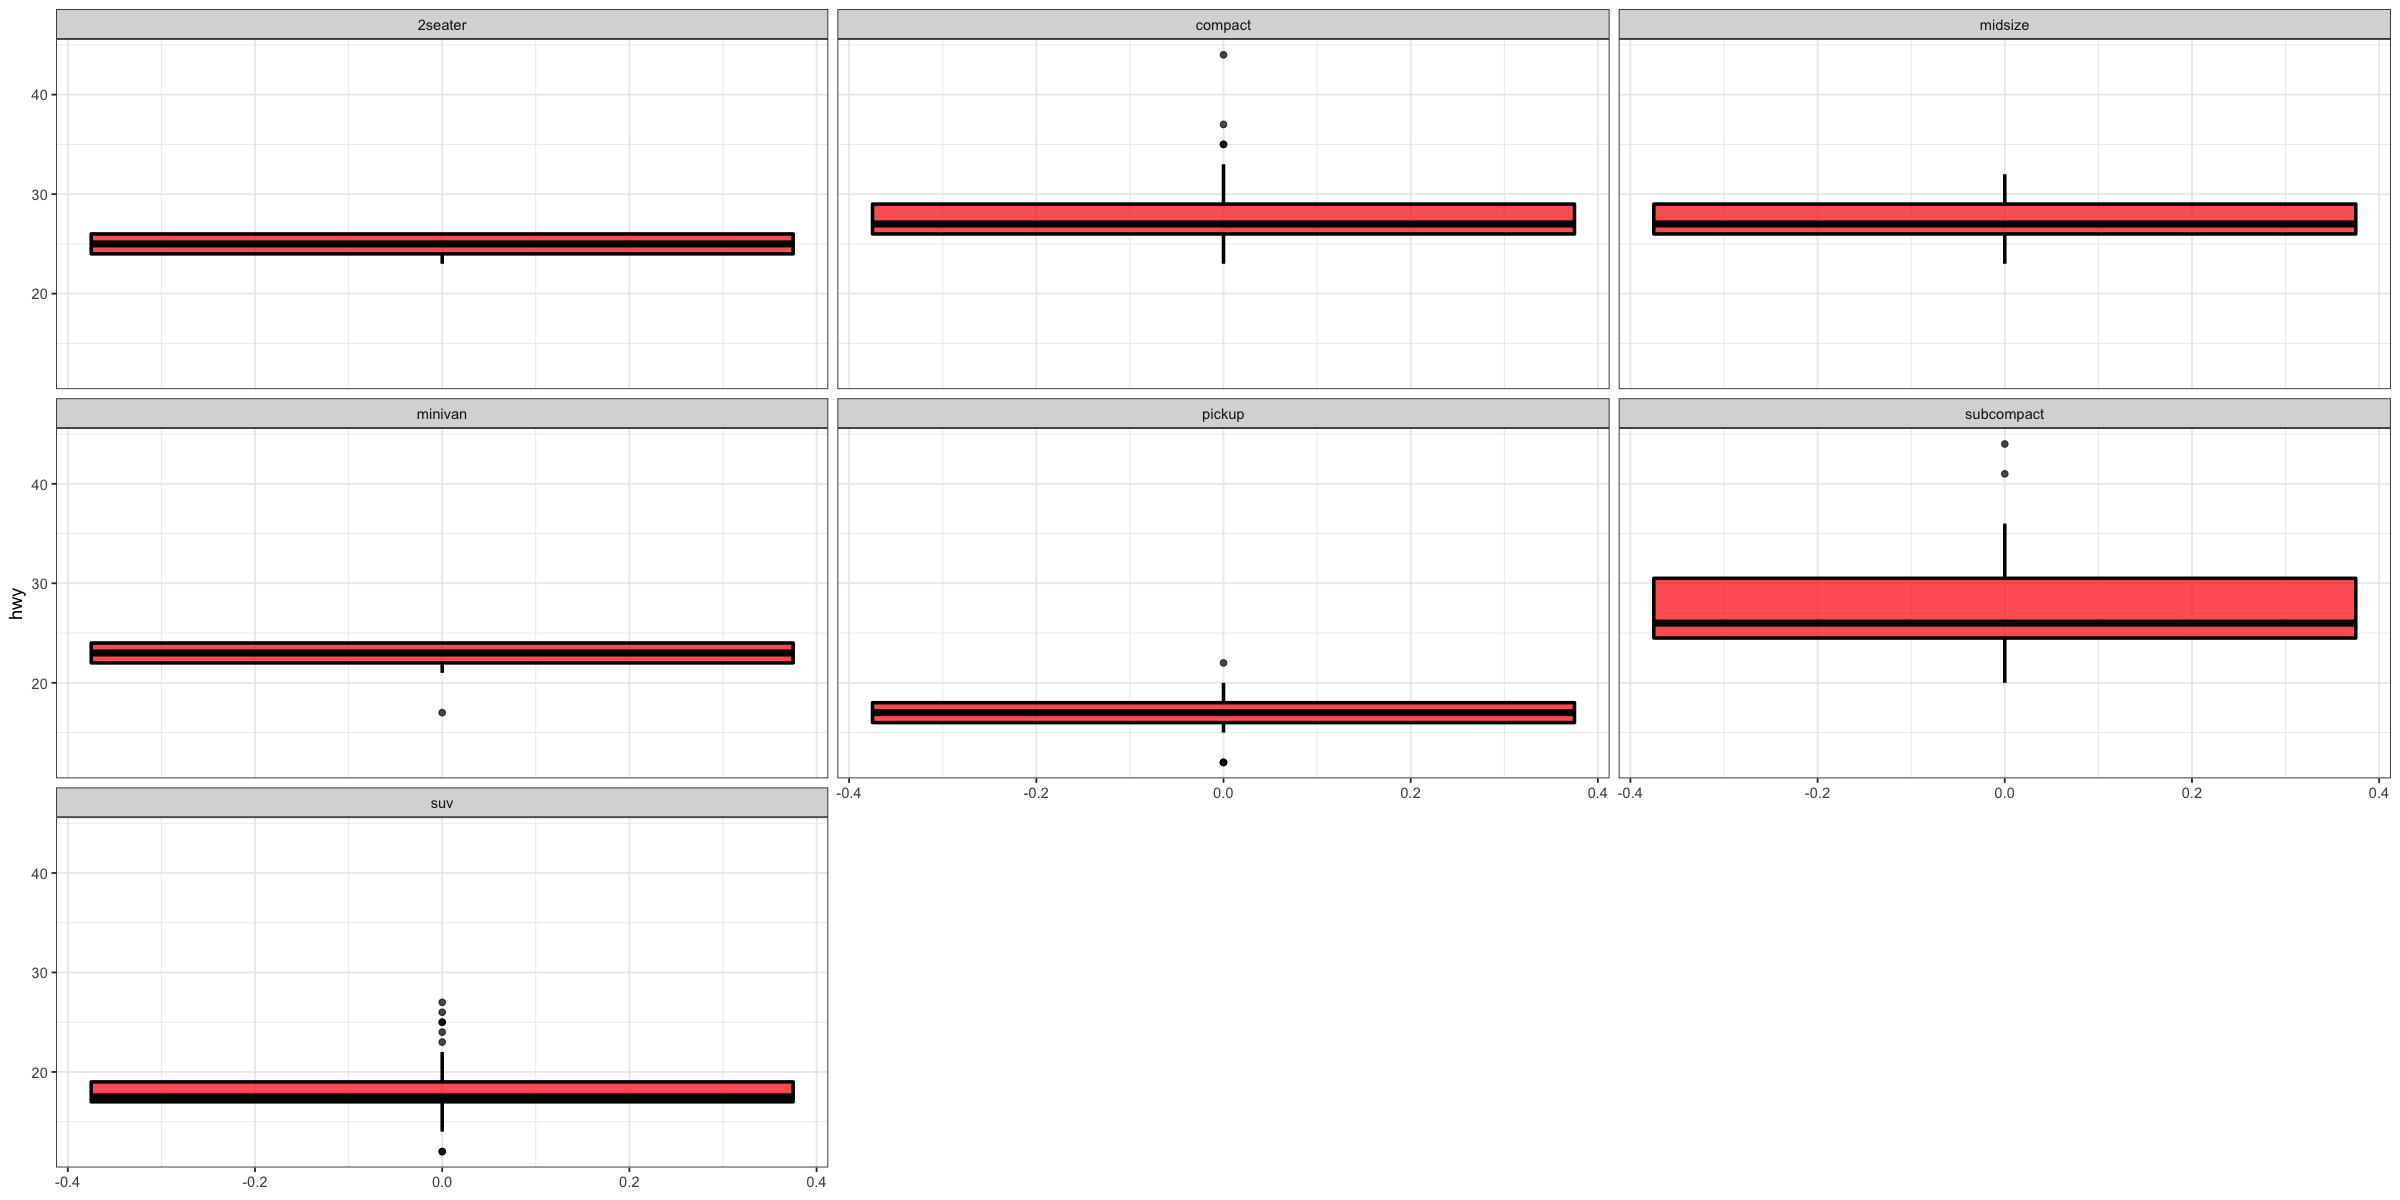

In [247]:
# Lastly we can facet_grid() which forms a matrix of panels defined by row and column faceting variables. 
# It is most useful when you have two discrete variables, and all combinations of the variables exist in the data. 
# If you have only one variable with many levels, try facet_wrap().


# we could plot the same boxplots above using facet_wrap - however need to do lots of formatting

options(repr.plot.width=20, repr.plot.height=10)

mpg %>%
    ggplot(aes(y=hwy)) +
        geom_boxplot(fill="red1", color="black", alpha=0.7, size = 1) +
        facet_wrap(~class, ncol=3) + 
        theme_bw()



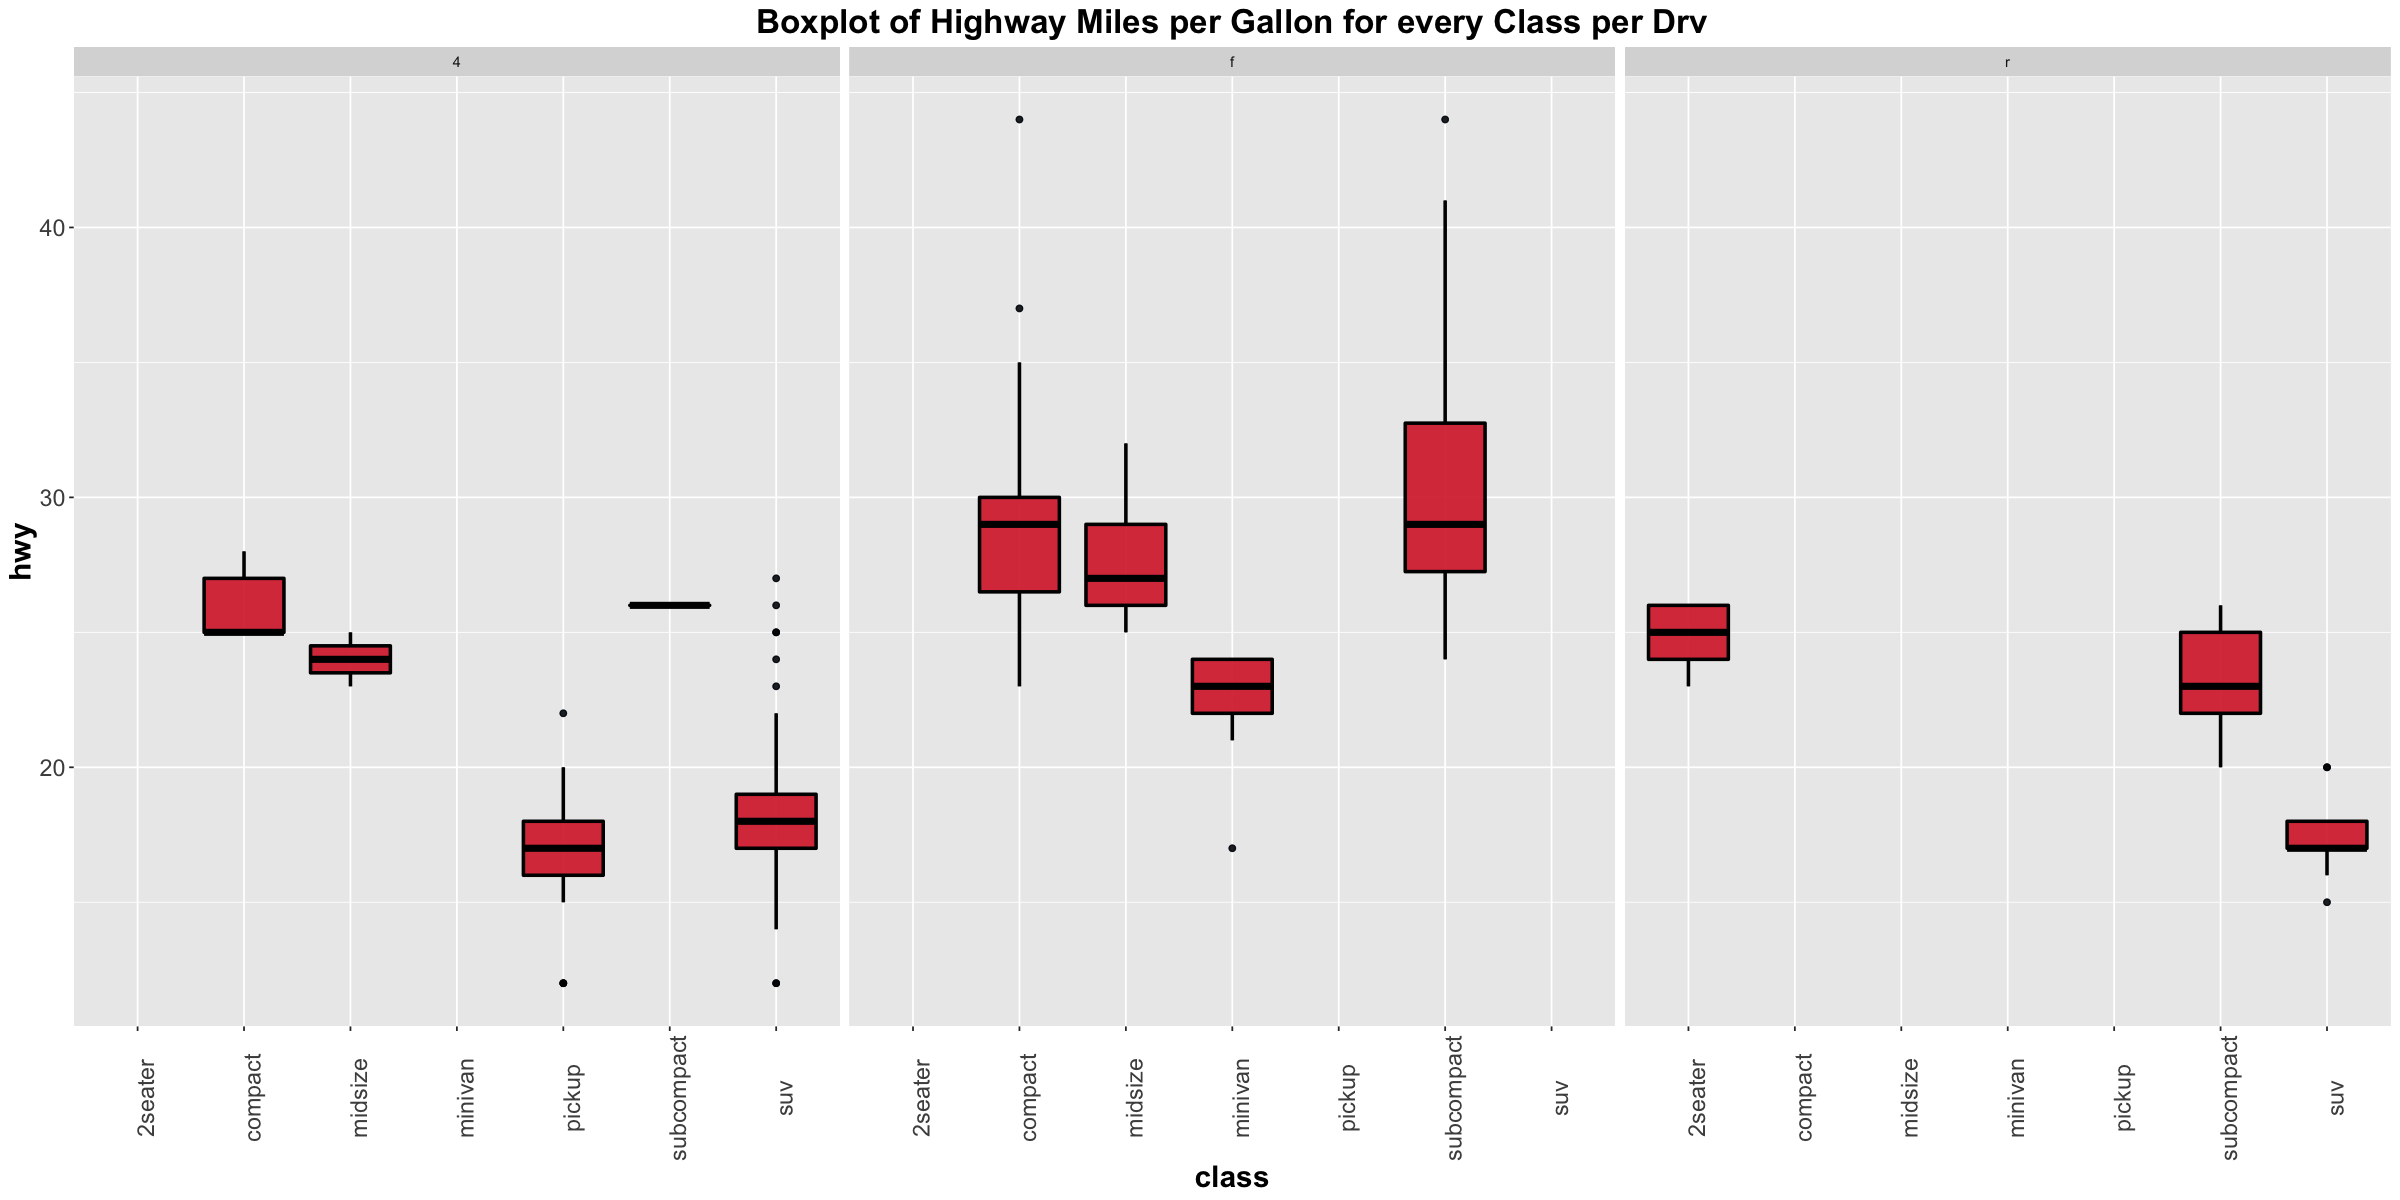

In [224]:
# we could use facet grid if we want to represent Highway Miles per Gallon for every Class for another variables

options(repr.plot.width=20, repr.plot.height=10)

bp + 
    facet_grid(cols = vars(drv)) +
    theme(axis.title.x = element_text(size=18, face='bold'),
          axis.title.y = element_text(size=18, face='bold')) +
    ggtitle("Boxplot of Highway Miles per Gallon for every Class per Drv") 

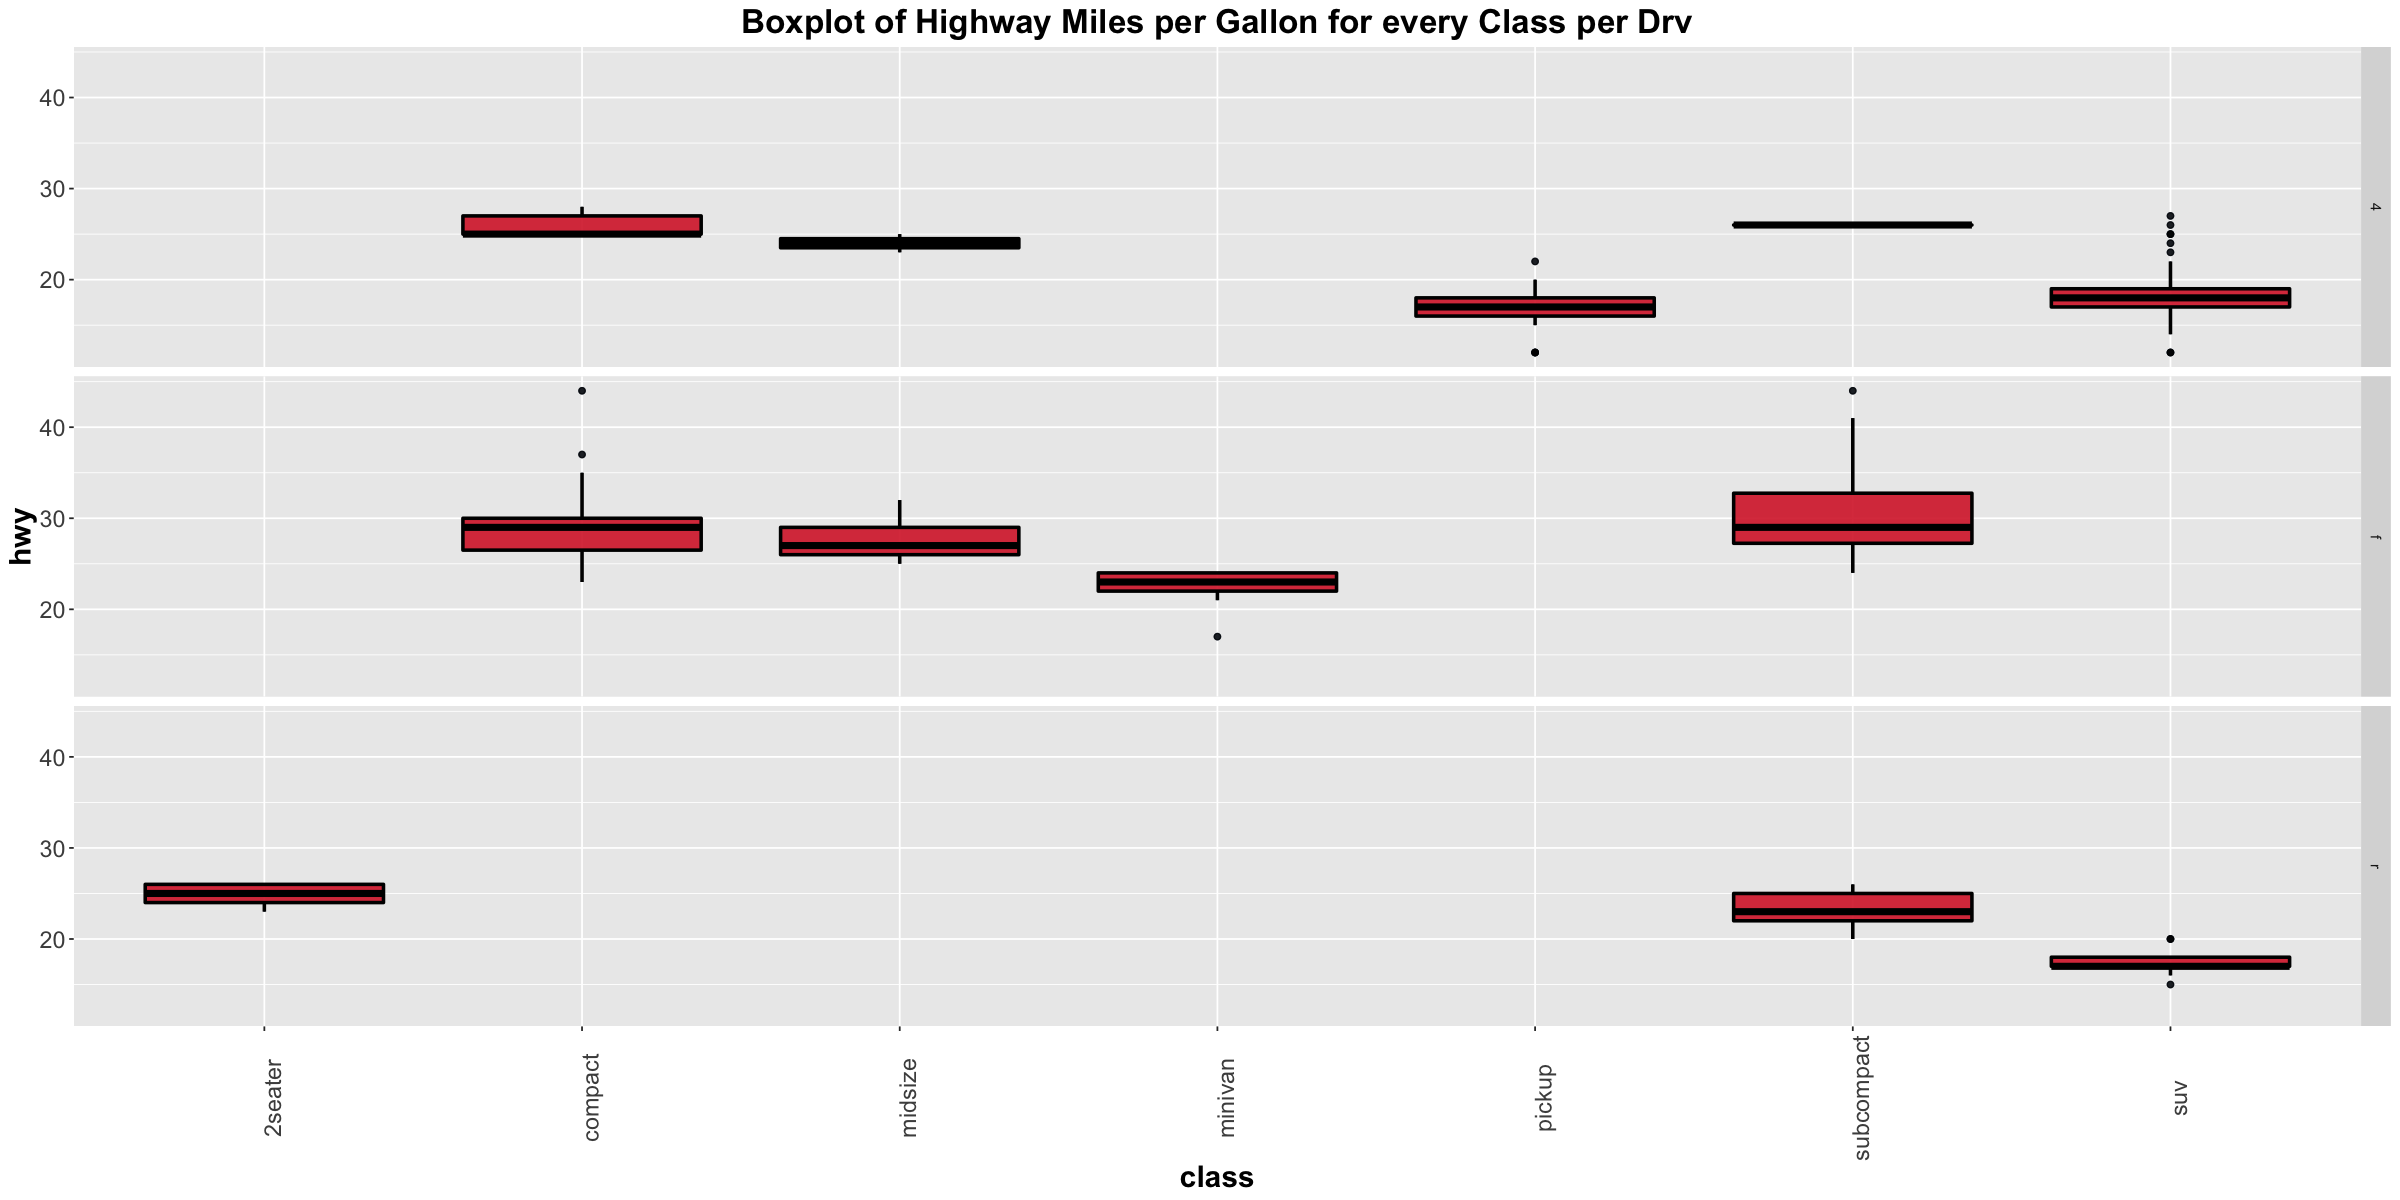

In [225]:
bp + 
    facet_grid(rows = vars(drv)) +
    theme(axis.title.x = element_text(size=18, face='bold'),
          axis.title.y = element_text(size=18, face='bold')) +
    ggtitle("Boxplot of Highway Miles per Gallon for every Class per Drv") 

### Correlation

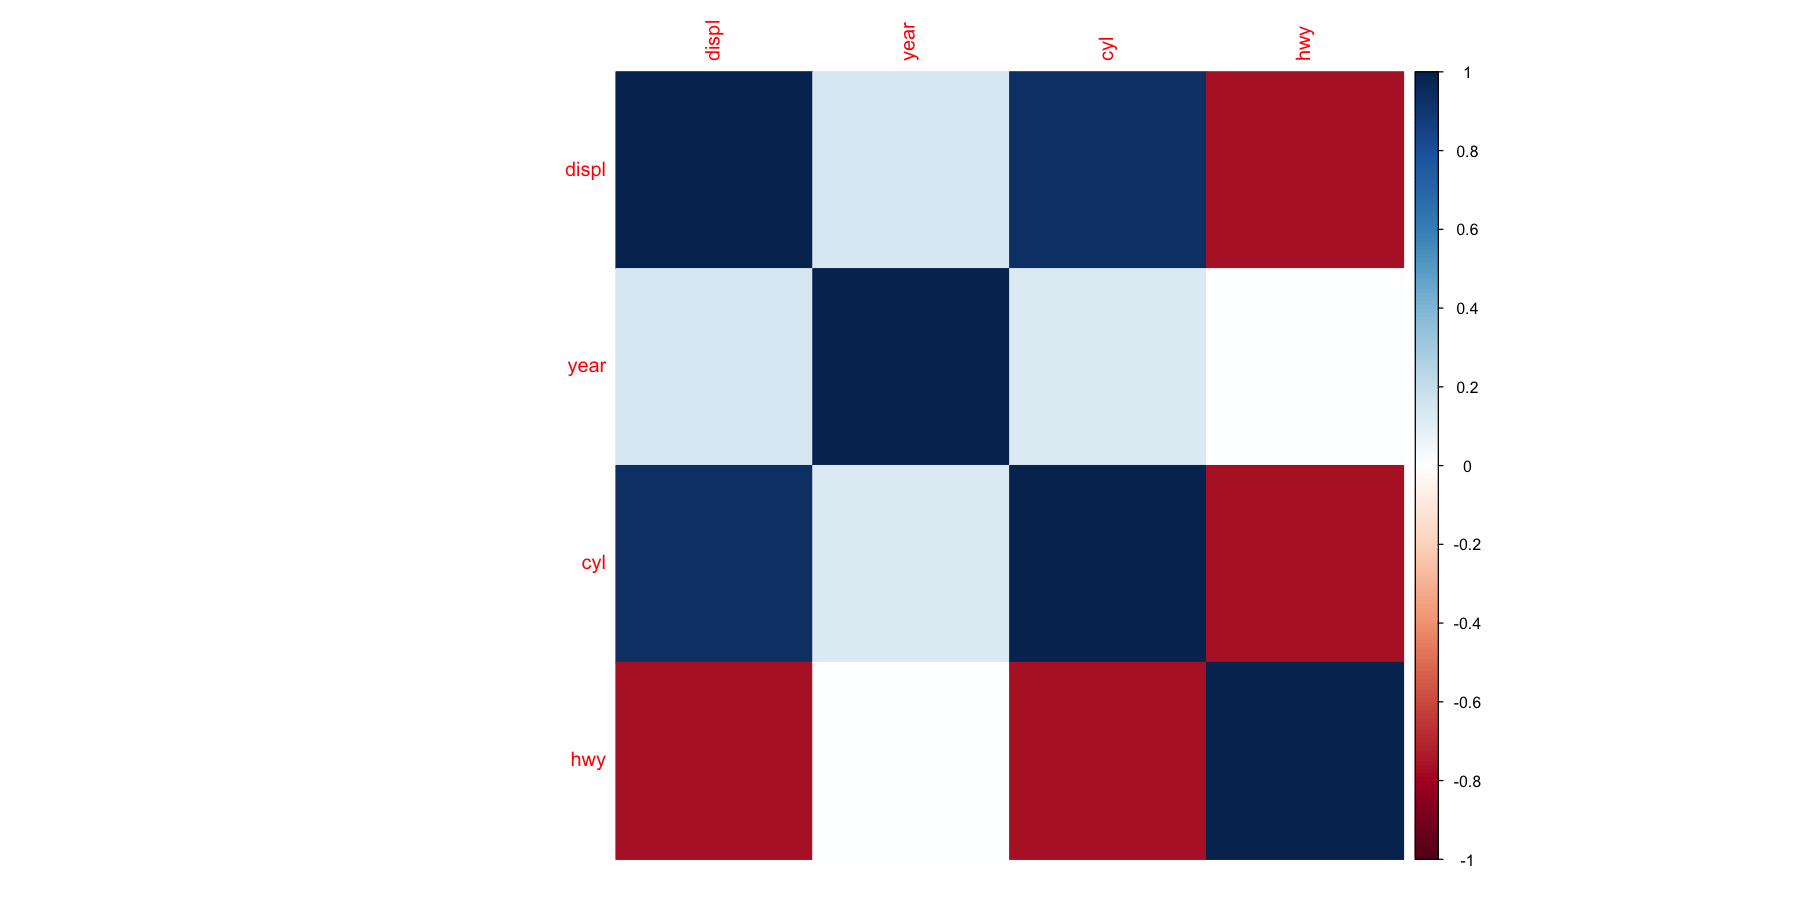

In [199]:
numeric_data <- mpg[, sapply(mpg, is.numeric)]
M <- cor(numeric_data)

corrplot(M, method="color")

Resources: https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html